# PROFILE ORDERING HABITS ANALYZATION

<a id='0'></a> <br>
 # Table of Contents 

[Import Data and Libraries](#0.1) 
 
1. [Customer Profile Usage Frequency and Expenditure](#1)     
    1. [Usage Frequency](#2) 
        1. [days_since_prior_order](#3)
        1. [age_range and dependants](#4)
        1. [prior_order_median](#5)
        1. [max_orders](#6)
        1. [order_freq_flag](#7)
    1. [Expenditure](#8)
        1. [prices](#9)
        1. [age_group](#10)
1. [Customer Profile and Region](#11)
    1. [Income Group](#12)
    1. [Count](#13)
    1. [Regional Total Spend](#14)
    1. [Customer Profile Total Spend by Region](#15)
    1. [Customer Profile spend and Department ](#16)
1. [Check final df and remove/rename columns](#17)

<a id='0.1'></a> <br>
# Import Data and Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
import plotly.express as px

In [3]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from plotly import tools
from plotly.subplots import make_subplots

In [4]:
# creates path

path = r'G:\My Drive\CareerFoundry\Python Projects\2023-10 Instacart Basket Analysis'

In [5]:
# imports latest dataframe (ic_final_df)

ic_final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_final_df.pkl'))

In [6]:
# check output

ic_final_df.shape

(30964564, 39)

In [11]:
# shows all columns

pd.set_option('display.max_columns', None)

In [46]:
# shows all rows

pd.set_option('display.max_rows', None)

In [8]:
# check output

ic_final_df.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day_x,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,order_freq_flag,gender,state,age,dependants,fam_status,income,region,max_order,low_activity_flag,department,age_range,age_group,income_group,most_freq_dept,most_ordered_product,most_freq_day,fav_day_to_shop,most_freq_hour,fav_time_to_shop,customer_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent


<a id='1'></a> <br>
# 1. Customer Profile Usage Frequency and Expenditure
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

<a id='2'></a> <br>
> # A. Usage Frequency
<a id='3'></a> <br>
>> # a. days_since_prior_order

In [7]:
# creates subset of ic_final_df (profile, number_of_orders, user_id, days_prior)

cust_freq_df = ic_final_df[['customer_profile', 'user_id', 'number_of_orders', 'days_since_prior_order']].copy()

In [8]:
# check output

cust_freq_df

,customer_profile,user_id,number_of_orders,days_since_prior_order
0,Young married parent,1,1,0.0
1,Young married parent,1,2,15.0
2,Young married parent,1,3,21.0
3,Young married parent,1,4,29.0
4,Young married parent,1,5,28.0
...,...,...,...,...
30964559,Older single adult,194803,1,0.0
30964560,Older single adult,194803,3,13.0
30964561,Older single adult,194803,4,20.0
30964562,Older single adult,194803,5,23.0


In [9]:
# remove all first orders

condition = cust_freq_df['number_of_orders'] < 2 # first order is always 0 and will skew results

cust_freq_df = cust_freq_df.drop(cust_freq_df[condition].index) # removes all rows where number_of_orders < 2

In [10]:
# check output

cust_freq_df

,customer_profile,user_id,number_of_orders,days_since_prior_order
1,Young married parent,1,2,15.0
2,Young married parent,1,3,21.0
3,Young married parent,1,4,29.0
4,Young married parent,1,5,28.0
5,Young married parent,1,6,19.0
...,...,...,...,...
30964558,Older single adult,194803,7,30.0
30964560,Older single adult,194803,3,13.0
30964561,Older single adult,194803,4,20.0
30964562,Older single adult,194803,5,23.0


In [11]:
cust_freq_df.describe()

,number_of_orders,days_since_prior_order
count,2.930328e+07,2.930328e+07
mean,1.878851e+01,1.081030e+01
std,1.765293e+01,8.578590e+00
min,2.000000e+00,0.000000e+00
25%,6.000000e+00,5.000000e+00
50%,1.300000e+01,7.000000e+00
75%,2.600000e+01,1.400000e+01
max,9.900000e+01,3.000000e+01


In [12]:
cust_freq_df.shape

(29303281, 4)

In [13]:
# aggregates the max, min, mean of df with groupby and ignoring 0s

cust_freq_mmm = cust_freq_df.groupby('customer_profile').agg({'days_since_prior_order': ['max', 'mean', 'min']})

In [14]:
# check output

cust_freq_mmm

days_since_prior_order                
                                              max       mean  min
customer_profile                                                 
Middle aged married parent                   30.0  10.851995  0.0
Middle aged single adult                     30.0  10.723006  0.0
Older married parent                         30.0  10.817469  0.0
Older single adult                           30.0  10.750328  0.0
Young married parent                         30.0  10.790247  0.0
Young single adult                           30.0  10.896484  0.0
Young single parent                          30.0  10.750995  0.0

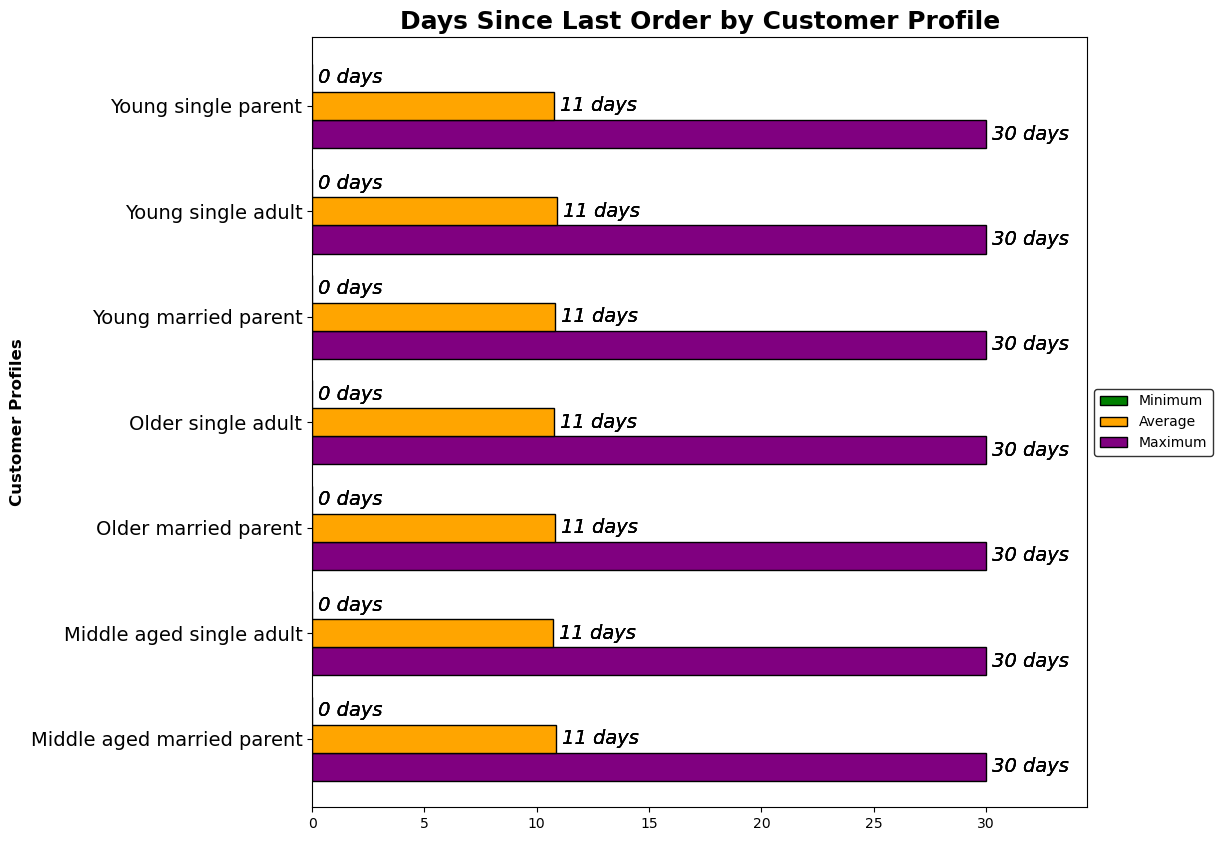

In [94]:
# creates bar chart of cust_freq_mmm

barh_cust_freq_mmm = cust_freq_mmm.sort_index().plot.barh(width=.8, figsize=(10, 10), color=['purple', 'orange', 'green'], edgecolor='black')
for customer_profile in barh_cust_freq_mmm.containers:
    
    # adds commas
    for c in barh_cust_freq_mmm.containers:
        barh_cust_freq_mmm.bar_label(c, fmt=' {:,.0f} days', fontstyle='italic', fontsize=14)
        
    # adds 20% whitespace to margins to keep labels inside the box
    barh_cust_freq_mmm.margins(x=0.15)

plt.yticks(fontsize=14, fontweight='medium')
plt.ylabel('Customer Profiles', fontsize=12, fontweight='bold')
plt.title('Days Since Last Order by Customer Profile', fontsize=18, fontweight='bold')
plt.legend(labels=('Maximum', 'Average', 'Minimum'), loc='center left', bbox_to_anchor=(1, 0.5), reverse=True, edgecolor='black')

In [95]:
# Export chart to the visualizations folder using savefig() function

barh_cust_freq_mmm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_cust_freq_mmm.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

### - Results show no variance.

<a id='4'></a> <br>
>> # b. age_range and dependants

In [17]:
# aggregates the max, min, mean of df with groupby and ignoring 0s

age_range_freq_mmm = ic_final_df.replace(0, np.nan).groupby('age_range').agg({'days_since_prior_order': ['max', 'mean', 'min']})

In [18]:
# check output

age_range_freq_mmm

days_since_prior_order                
                             max       mean  min
age_range                                       
18-24                       30.0  10.932891  1.0
25-34                       30.0  11.021232  1.0
35-44                       30.0  10.946686  1.0
45-54                       30.0  10.974587  1.0
55-64                       30.0  11.017684  1.0
65+                         30.0  10.954754  1.0

In [19]:
# aggregates the max, min, mean of df with groupby and ignoring 0s

dependants_freq_mmm = ic_final_df.replace(0, np.nan).groupby('dependants').agg({'days_since_prior_order': ['max', 'mean', 'min']})

In [20]:
# check output

dependants_freq_mmm

days_since_prior_order                
                              max       mean  min
dependants                                       
1.0                          30.0  10.963630  1.0
2.0                          30.0  10.994677  1.0
3.0                          30.0  10.978406  1.0

### - Still no variance.

<a id='5'></a> <br>
>> # c. prior_order_median

In [13]:
# add 'prior_order_median' back to df

ic_final_df['prior_order_median'] = ic_final_df.replace(0, np.nan).groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [22]:
ic_final_df.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day_x,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,order_freq_flag,gender,state,age,dependants,fam_status,income,region,max_order,low_activity_flag,department,age_range,age_group,income_group,most_freq_dept,most_ordered_product,most_freq_day,fav_day_to_shop,most_freq_hour,fav_time_to_shop,customer_profile,prior_order_median
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0


In [24]:
# create new aggregate the max, min, mean of df with groupby

cust_fqcy_mmm = ic_final_df.groupby('customer_profile').agg({'prior_order_median': ['max', 'mean', 'min']})

In [25]:
# check output

cust_fqcy_mmm

prior_order_median                
                                          max       mean  min
customer_profile                                             
Middle aged married parent               30.0  10.105635  1.0
Middle aged single adult                 30.0   9.978557  1.0
Older married parent                     30.0  10.075644  1.0
Older single adult                       30.0   9.987054  1.0
Young married parent                     30.0  10.029841  1.0
Young single adult                       30.0  10.145416  1.0
Young single parent                      30.0   9.977900  1.0

### - Still no variance.

<a id='6'></a> <br>
>> # d. max_orders

In [26]:
# creates subset of ic_final_df (profile, user_id, max_order)

cust_max_order_df = ic_final_df[['customer_profile', 'user_id', 'max_order']].copy()

In [27]:
# check output

cust_max_order_df

,customer_profile,user_id,max_order
0,Young married parent,1,10
1,Young married parent,1,10
2,Young married parent,1,10
3,Young married parent,1,10
4,Young married parent,1,10
...,...,...,...
30964559,Older single adult,194803,7
30964560,Older single adult,194803,7
30964561,Older single adult,194803,7
30964562,Older single adult,194803,7


In [28]:
# remove duplicates to pare down to only 1 instance of each user_id

cust_max_order_df = cust_max_order_df.drop_duplicates()

In [29]:
# check output

cust_max_order_df.shape

(162631, 3)

In [30]:
cust_max_order_df.head()

,customer_profile,user_id,max_order
0,Young married parent,1,10
59,Older single adult,15,22
131,Older married parent,19,9
335,Older single adult,21,33
540,Young married parent,31,20


In [31]:
# aggregates the max, min, mean of df with groupby

cust_max_order_mmm = cust_max_order_df.groupby('customer_profile').agg({'max_order': ['max', 'mean', 'min']})

In [32]:
# check output

cust_max_order_mmm

max_order               
                                 max       mean min
customer_profile                                   
Middle aged married parent        99  18.808904   5
Middle aged single adult          99  18.987275   5
Older married parent              99  18.802561   5
Older single adult                99  18.894874   5
Young married parent              99  18.863065   5
Young single adult                99  18.687158   5
Young single parent               99  19.110016   5

### - No significant variance found. Poor statistic to use for evaluation.

<a id='7'></a> <br>
>> # e. order_freq_flag

In [55]:
# creates subset of ic_final_df (profile, user_id, max_order)

cust_ord_freq_df = ic_final_df[['customer_profile', 'user_id', 'order_freq_flag']].copy()

In [56]:
# check output

cust_ord_freq_df

,customer_profile,user_id,order_freq_flag
0,Young married parent,1,Regular customer
1,Young married parent,1,Regular customer
2,Young married parent,1,Regular customer
3,Young married parent,1,Regular customer
4,Young married parent,1,Regular customer
...,...,...,...
30964559,Older single adult,194803,Non-frequent customer
30964560,Older single adult,194803,Non-frequent customer
30964561,Older single adult,194803,Non-frequent customer
30964562,Older single adult,194803,Non-frequent customer


In [57]:
# remove duplicates to pare down to only 1 instance of each user_id

cust_ord_freq_df = cust_ord_freq_df.drop_duplicates()

In [58]:
# check output

cust_ord_freq_df

,customer_profile,user_id,order_freq_flag
0,Young married parent,1,Regular customer
59,Older single adult,15,Frequent customer
131,Older married parent,19,Frequent customer
335,Older single adult,21,Frequent customer
540,Young married parent,31,Frequent customer
...,...,...,...
30964521,Middle aged single adult,157447,Non-frequent customer
30964537,Young married parent,95228,Frequent customer
30964544,Middle aged married parent,162836,Regular customer
30964549,Young married parent,105857,Frequent customer


In [61]:
# create crosstab of customer_profile and order_freq_flag

cust_ord_freq_ct = pd.crosstab(cust_ord_freq_df['customer_profile'], cust_ord_freq_df['order_freq_flag'])[['Non-frequent customer', 'Regular customer', 'Frequent customer']]

In [62]:
cust_ord_freq_ct

order_freq_flag,Non-frequent customer,Regular customer,Frequent customer
customer_profile,,,
Middle aged married parent,6596,11556,20237
Middle aged single adult,2202,3903,6704
Older married parent,7235,12758,21949
Older single adult,2327,4200,7304
Young married parent,5850,10354,17761
Young single adult,2425,4392,7270
Young single parent,1320,2241,4047


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Young single parent'),
  Text(0, 1, 'Middle aged single adult'),
  Text(0, 2, 'Older single adult'),
  Text(0, 3, 'Young single adult'),
  Text(0, 4, 'Young married parent'),
  Text(0, 5, 'Middle aged married parent'),
  Text(0, 6, 'Older married parent')])

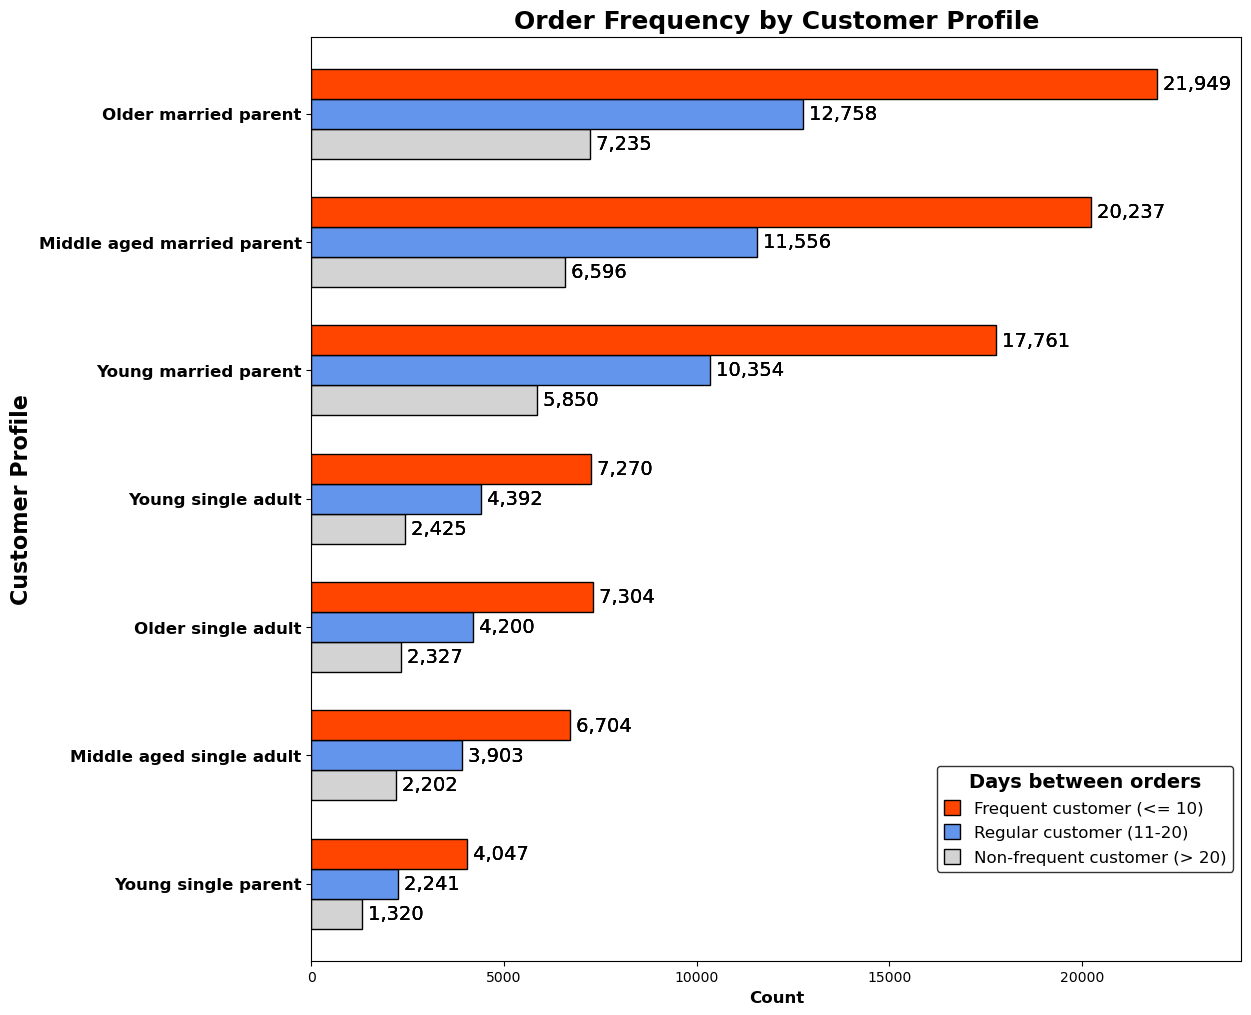

In [88]:
# creates stacked bar chart of customer_profile and order_freq_flag

barh_cust_ord_freq = cust_ord_freq_ct.loc[cust_ord_freq_ct.sum(axis=1).sort_values().index].plot.barh(figsize=(12, 12), width=0.7, color=['lightgrey', 'cornflowerblue', 'orangered'], linewidth=1, edgecolor='black')
for age_group in barh_cust_ord_freq.containers:
    
    # adds commas
    for c in barh_cust_ord_freq.containers:
        barh_cust_ord_freq.bar_label(c, fmt=' {:,.0f}', fontweight='medium', fontsize=14, label_type='edge')
   
    # adds whitespace to margins to keep labels inside the box
    barh_cust_ord_freq.margins(x=0.1)
    
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Customer Profile', fontsize=16, fontweight='bold')
plt.title('Order Frequency by Customer Profile', fontsize=18, fontweight='bold')
plt.legend(title='Days between orders', title_fontproperties={'weight':'bold', 'size':14}, reverse=True, handlelength=1, handleheight=1, prop={'size':12}, labels=['Non-frequent customer (> 20)', 'Regular customer (11-20)', 'Frequent customer (<= 10)'], edgecolor='black', bbox_to_anchor=(1, .22))

plt.xticks(rotation = 360)
plt.yticks(fontsize=12, fontweight='bold')

In [89]:
# Export chart to the visualizations folder using savefig() function

barh_cust_ord_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_cust_ord_freq.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

<a id='8'></a> <br>
> # B. Expenditure
<a id='9'></a> <br>
>> # a. prices

In [33]:
# aggregates the max, min, mean of df with groupby and ignoring 0s

cust_expend_mmm = ic_final_df.groupby('customer_profile').agg({'prices': ['max', 'mean', 'min']})

In [34]:
# check output

cust_expend_mmm

prices                
                                max       mean  min
customer_profile                                   
Middle aged married parent  99999.0  11.725969  1.0
Middle aged single adult    99999.0  12.928428  1.0
Older married parent        99999.0  11.788405  1.0
Older single adult          99999.0  11.532741  1.0
Young married parent        99999.0  12.378119  1.0
Young single adult          99999.0  11.913898  1.0
Young single parent         99999.0  10.890167  1.0

In [35]:
# Change outliers to NaN to correct skew of distribution

ic_final_df.loc[ic_final_df['prices'] >100, 'prices'] = np.nan

In [36]:
# aggregates the max, min, mean of df with groupby and ignoring 0s

cust_exp_mmm = ic_final_df.groupby('customer_profile').agg({'prices': ['max', 'mean', 'min']})

In [37]:
# check output

cust_exp_mmm

prices               
                              max      mean  min
customer_profile                                
Middle aged married parent   25.0  7.792658  1.0
Middle aged single adult     25.0  7.788593  1.0
Older married parent         25.0  7.793589  1.0
Older single adult           25.0  7.801014  1.0
Young married parent         25.0  7.783595  1.0
Young single adult           25.0  7.779027  1.0
Young single parent          25.0  7.800604  1.0

In [38]:
cust_exp_sum = ic_final_df.groupby('customer_profile').agg({'prices': 'sum'})

In [39]:
# check output

cust_exp_sum

,prices
customer_profile,
Middle aged married parent,56807815.4
Middle aged single adult,18953345.7
Older married parent,61787774.3
Older single adult,20632363.5
Young married parent,50766622.1
Young single adult,20693783.5
Young single parent,11552531.1


Text(0.5, 1.0, 'Total Expenditure by Customer Profile')

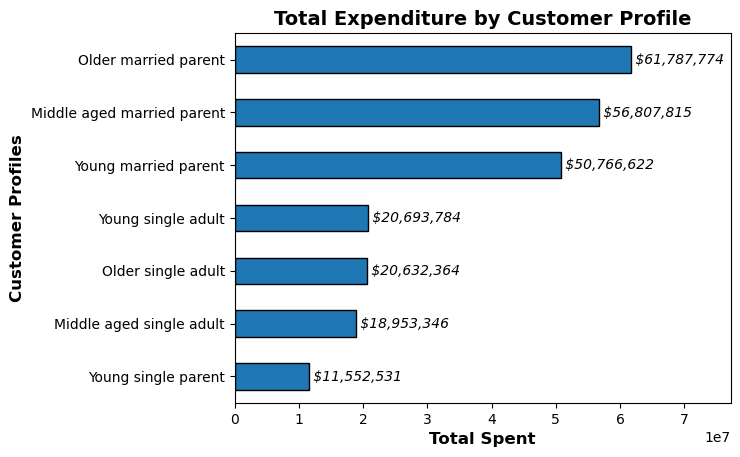

In [90]:
# creates bar chart of prices

barh_cust_exp_sum = cust_exp_sum.sort_values(by='prices').plot.barh(legend=None, edgecolor='black')
for customer_profile in barh_cust_exp_sum.containers:
    
    # adds commas
    for c in barh_cust_exp_sum.containers:
        barh_cust_exp_sum.bar_label(c, fmt=' ${:,.0f}', fontstyle='italic')
        
    # adds 20% whitespace to margins to keep labels inside the box
    barh_cust_exp_sum.margins(x=0.25)

plt.xlabel('Total Spent', fontsize=12, fontweight='bold')
plt.ylabel('Customer Profiles', fontsize=12, fontweight='bold')
plt.title('Total Expenditure by Customer Profile', fontsize=14, fontweight='bold')

In [91]:
# Export chart to the visualizations folder using savefig() function

barh_cust_exp_sum.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_cust_exp_sum.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

<a id='10'></a> <br>
>> # b. age_group

In [42]:
# aggregates the max, min, mean of df with groupby and ignoring 0s

age_group_expend_mmm = ic_final_df.groupby('age_group').agg({'prices': ['sum', 'max', 'mean', 'min']})

In [43]:
# check output

age_group_expend_mmm

prices                     
                    sum   max      mean  min
age_group                                   
Middle aged  75761161.1  25.0  7.791641  1.0
Older        82420137.8  25.0  7.795446  1.0
Young        83012936.7  25.0  7.784818  1.0

In [44]:
# Change outliers to NaN to correct skew of distribution

ic_final_df.loc[ic_final_df['prices'] >100, 'prices'] = np.nan

In [45]:
df = ic_final_df.groupby(['customer_profile', 'order_id']).agg({'prices': 'sum'})

In [46]:
# check output

df

prices
customer_profile           order_id        
Middle aged married parent 2           91.6
                           3           70.3
                           10         132.8
                           18         193.9
                           21          50.3
...                                     ...
Young single parent        3420873     51.5
                           3420957     21.1
                           3420997    148.2
                           3421050    100.9
                           3421061    156.3

[3064375 rows x 1 columns]

In [47]:
df.describe()

,prices
count,3.064375e+06
mean,7.870911e+01
std,6.009045e+01
min,0.000000e+00
25%,3.470000e+01
50%,6.440000e+01
75%,1.075000e+02
max,1.092200e+03


In [48]:
df2 = df.replace(0, np.nan).groupby('customer_profile').agg({'prices': ['min', 'mean', 'max']}).sort_values(by=('prices', 'max'), ascending=False)

In [49]:
# check output

df2

prices                   
                              min       mean     max
customer_profile                                    
Middle aged married parent    1.0  78.679659  1092.2
Older single adult            1.0  78.952284   875.0
Young married parent          1.0  79.242861   842.1
Older married parent          1.0  78.354005   787.0
Young single parent           1.0  79.466017   750.3
Middle aged single adult      1.0  77.936370   712.0
Young single adult            1.0  78.614240   624.3

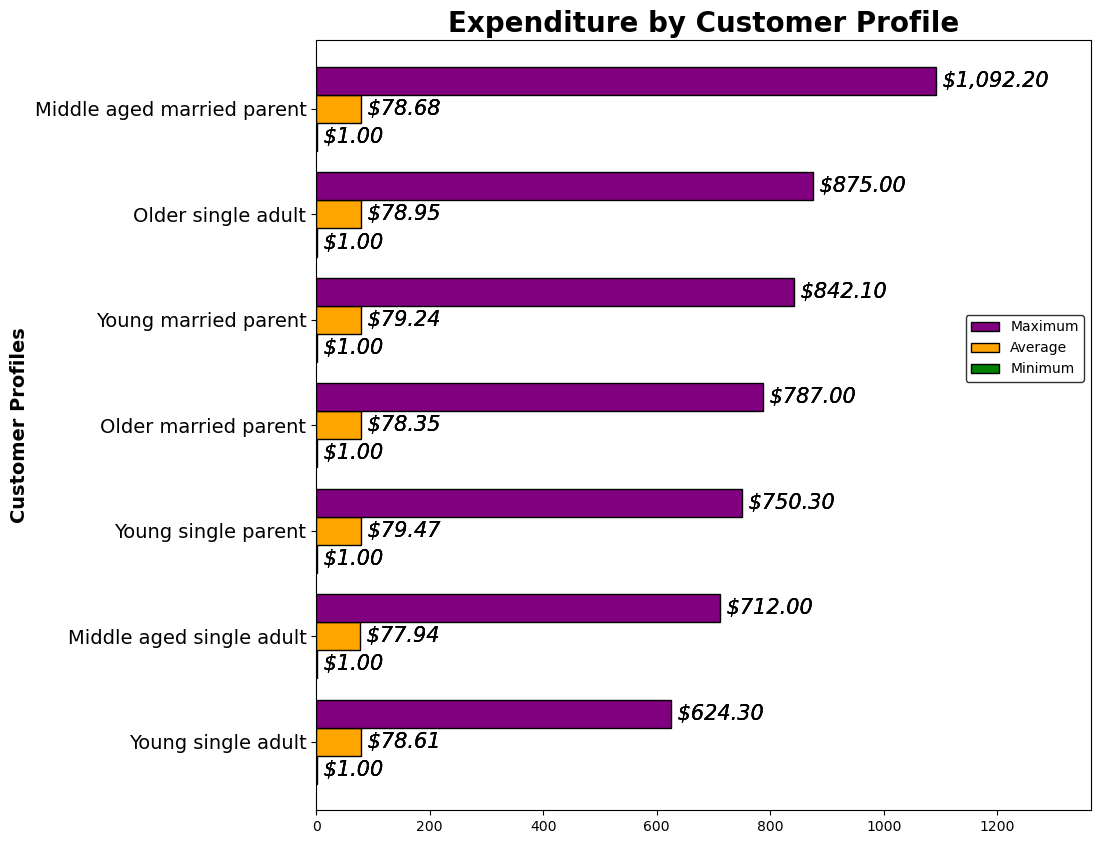

In [96]:
# creates bar chart of df2

barh_profile_expend_mmm = df2.sort_values(by=('prices', 'max'), ascending=True).plot.barh(width=.8, figsize=(10, 10), color=['green', 'orange', 'purple'], edgecolor='black')
for customer_profile in barh_profile_expend_mmm.containers:
    
    # adds commas
    for c in barh_profile_expend_mmm.containers:
        barh_profile_expend_mmm.bar_label(c, fmt=' ${:,.2f}', fontstyle='italic', fontsize=15)
        
    # adds 20% whitespace to margins to keep labels inside the box
    barh_profile_expend_mmm.margins(x=0.25)

plt.yticks(fontsize=14, fontweight='medium')
plt.ylabel('Customer Profiles', fontsize=14, fontweight='bold')
plt.title('Expenditure by Customer Profile', fontsize=20, fontweight='bold')
plt.legend(labels=('Minimum', 'Average', 'Maximum'), loc='right', bbox_to_anchor=(1, 0.6), reverse=True, edgecolor='black')

In [97]:
# Export chart to the visualizations folder using savefig() function

barh_profile_expend_mmm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_profile_expend_mmm.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

<a id='11'></a> <br>
# 2. Customer Profile and Region

<a id='12'></a> <br>
> # A. Income Group

In [10]:
# creates a crosstab of income_group and region

crosst_reg_incg = pd.crosstab(ic_final_df['region'], ic_final_df['income_group']).reindex(['Northeast', 'Midwest', 'West', 'South'])[['Low income', 'Middle income', 'High income']]

In [11]:
# check output

crosst_reg_incg

income_group,Low income,Middle income,High income
region,,,
Northeast,853002,3701978,909705
Midwest,1116955,4923173,1221385
West,1238775,5349898,1338554
South,1659590,6948111,1703438


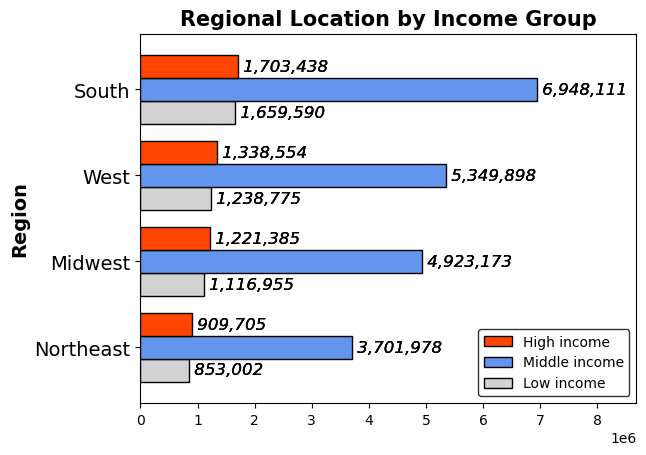

In [13]:
# creates bar chart of crosst_reg_incg

barh_reg_incg = crosst_reg_incg.plot.barh(width=0.8, color=['lightgrey', 'cornflowerblue', 'orangered'], linewidth=1, edgecolor='black')
for region in barh_reg_incg.containers:
    
    # adds commas
    for c in barh_reg_incg.containers:
        barh_reg_incg.bar_label(c, fmt=' {:,.0f}', fontstyle='italic', fontsize=12)
        
    # adds 20% whitespace to margins to keep labels inside the box
    barh_reg_incg.margins(x=0.25)

plt.yticks(fontsize=14, fontweight='medium')
plt.ylabel('Region', fontsize=14, fontweight='bold')
plt.title('Regional Location by Income Group', fontsize=15, fontweight='bold')
plt.legend(labels=('Low income', 'Middle income', 'High income'), loc='lower right', reverse=True, edgecolor='black')

In [14]:
# Export chart to the visualizations folder using savefig() function

barh_reg_incg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_reg_incg.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

<a id='13'></a> <br>
> # B. Count

In [110]:
# creates subset of ic_final_df (profile, user_id, region)

cust_reg_df = ic_final_df[['customer_profile', 'user_id', 'region']].copy()

In [111]:
# check output

cust_reg_df

,customer_profile,user_id,region
0,Young married parent,1,South
1,Young married parent,1,South
2,Young married parent,1,South
3,Young married parent,1,South
4,Young married parent,1,South
...,...,...,...
30964559,Older single adult,194803,Northeast
30964560,Older single adult,194803,Northeast
30964561,Older single adult,194803,Northeast
30964562,Older single adult,194803,Northeast


In [112]:
# remove duplicates to pare down to only 1 instance of each user_id

cust_reg_df = cust_reg_df.drop_duplicates()

In [113]:
# check output

cust_reg_df

,customer_profile,user_id,region
0,Young married parent,1,South
59,Older single adult,15,Midwest
131,Older married parent,19,South
335,Older single adult,21,West
540,Young married parent,31,South
...,...,...,...
30964521,Middle aged single adult,157447,South
30964537,Young married parent,95228,South
30964544,Middle aged married parent,162836,South
30964549,Young married parent,105857,West


In [116]:
# creates a crosstab of customer_profile and region

ct_cust_reg = pd.crosstab(cust_reg_df['customer_profile'], cust_reg_df['region'])[['Northeast', 'Midwest', 'West', 'South']]

In [117]:
# check output

ct_cust_reg

region,Northeast,Midwest,West,South
customer_profile,,,,
Middle aged married parent,6800,9198,9750,12641
Middle aged single adult,2254,3118,3259,4178
Older married parent,7285,9874,10720,14063
Older single adult,2471,3207,3548,4605
Young married parent,6015,7898,8704,11348
Young single adult,2530,3241,3562,4754
Young single parent,1226,1840,1938,2604


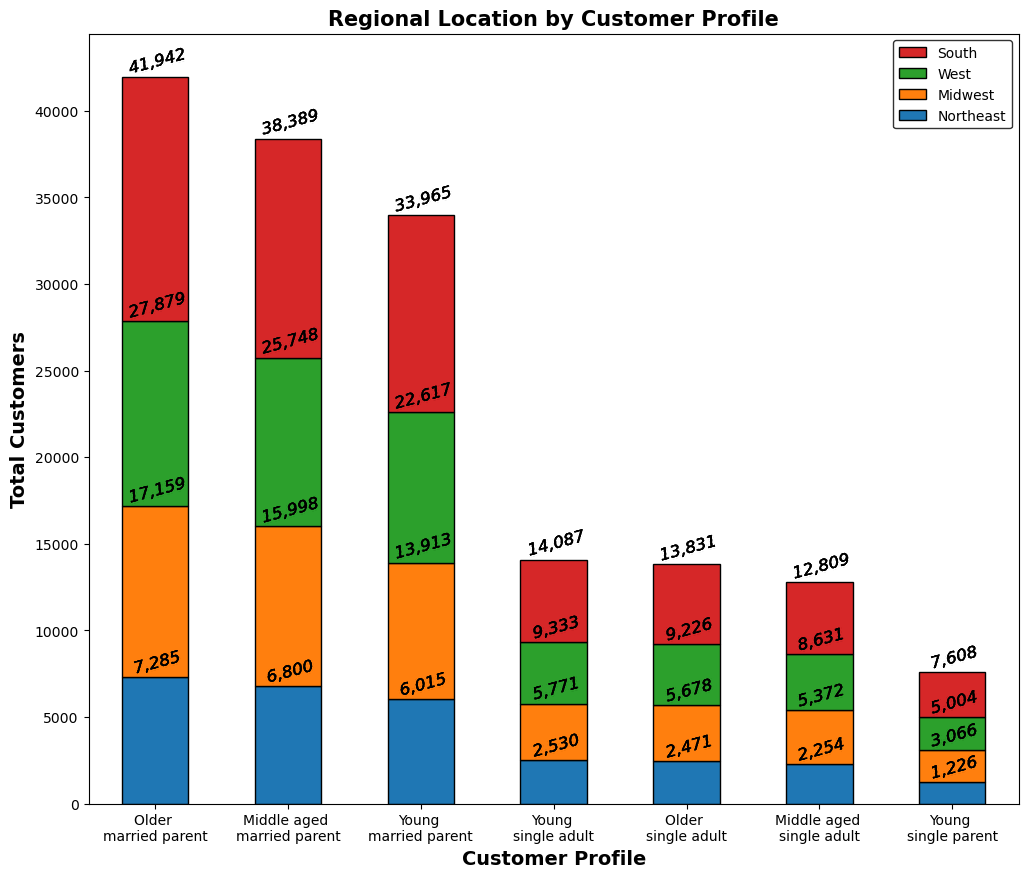

In [177]:
# creates bar chart of ct_cust_reg

sbar_cust_reg = ct_cust_reg.sort_values(by='South', ascending=False).plot.bar(stacked=True, width=0.5, figsize=(12, 10), linewidth=1, edgecolor='black')
for customer_profile in sbar_cust_reg.containers:
    
    # adds commas
    for c in sbar_cust_reg.containers:
        sbar_cust_reg.bar_label(c, fmt=' {:,.0f}', fontstyle='italic', fontsize=12, rotation=15)
        
    # adds 20% whitespace to margins to keep labels inside the box
    sbar_cust_reg.margins(x=0.25, y=0.06)

plt.xticks(np.arange(7), ['Older \nmarried parent', 'Middle aged \nmarried parent', 'Young \nmarried parent', 'Young \nsingle adult', 'Older \nsingle adult', 'Middle aged \nsingle adult', 'Young \nsingle parent'], rotation=360, fontsize=10, fontweight='medium')
# \n creates a line break in text
plt.xlabel('Customer Profile', fontsize=14, fontweight='bold')
plt.ylabel('Total Customers', fontsize=14, fontweight='bold')
plt.title('Regional Location by Customer Profile', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', reverse=True, edgecolor='black')

In [178]:
# Export chart to the visualizations folder using savefig() function

sbar_cust_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar_cust_reg.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

<a id='14'></a> <br>
> # C. Regional Total Spend

In [104]:
# Change outliers to NaN to correct skew of distribution

ic_final_df.loc[ic_final_df['prices'] >100, 'prices'] = np.nan

In [105]:
# aggregates the total spent per region

reg_prices = ic_final_df.groupby('region').agg({'prices': 'sum'})

In [106]:
# check output

reg_prices

,prices
region,
Midwest,56574613.8
Northeast,42516874.7
South,80356321.2
West,61746425.9


In [107]:
reg_prices = reg_prices.reindex(['Northeast', 'Midwest', 'West', 'South'])

In [108]:
# check output

reg_prices

,prices
region,
Northeast,42516874.7
Midwest,56574613.8
West,61746425.9
South,80356321.2


C:\Users\pjbac\AppData\Local\Temp\ipykernel_16656\276769191.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  absolute = int(pct / 100.*np.sum(allvalues))


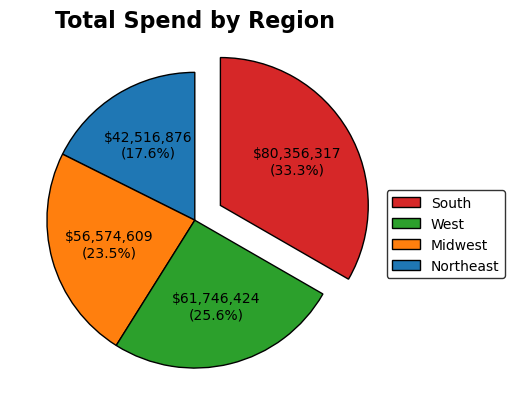

In [109]:
# Creating autocpt arguments

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "${:,d}\n({:.1f}%)".format(absolute, pct) 

# create the pie chart

pie_region_spend = plt.pie(x=reg_prices['prices'], autopct = lambda pct: func(pct, reg_prices),
        wedgeprops = {'linewidth' : 1, 'edgecolor' : 'black'},
        explode = (0.0, 0.0, 0.0, 0.2), 
        startangle = 90)

plt.title('Total Spend by Region', size=16, weight='bold')
plt.legend(reverse=True, bbox_to_anchor=(1, 0.6), labels=reg_prices.index, edgecolor='black')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_region_spend.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

<a id='15'></a> <br>
> # D. Customer Profile Total Spend by Region

In [110]:
# Change outliers to NaN to correct skew of distribution

ic_final_df.loc[ic_final_df['prices'] >100, 'prices'] = np.nan

In [15]:
# creates a pivot table of customer_profile and region to find total spent

pv_cust_reg_prices = ic_final_df.pivot_table(index=['customer_profile'],columns=['region'],values='prices',aggfunc = 'sum')[['Northeast', 'Midwest', 'West', 'South']]

In [16]:
# check output

pv_cust_reg_prices

region,Northeast,Midwest,West,South
customer_profile,,,,
Middle aged married parent,10134275.0,13507486.5,14586514.6,18579539.3
Middle aged single adult,3154442.1,4596538.9,4974989.1,6227375.6
Older married parent,10949410.2,14318217.0,15915578.4,20604568.7
Older single adult,3741538.9,4804310.6,5239149.3,6847364.7
Young married parent,8900977.5,11796818.0,12963886.2,17104940.4
Young single adult,3647864.0,4804380.5,5193916.7,7047622.3
Young single parent,1988367.0,2746862.3,2872391.6,3944910.2


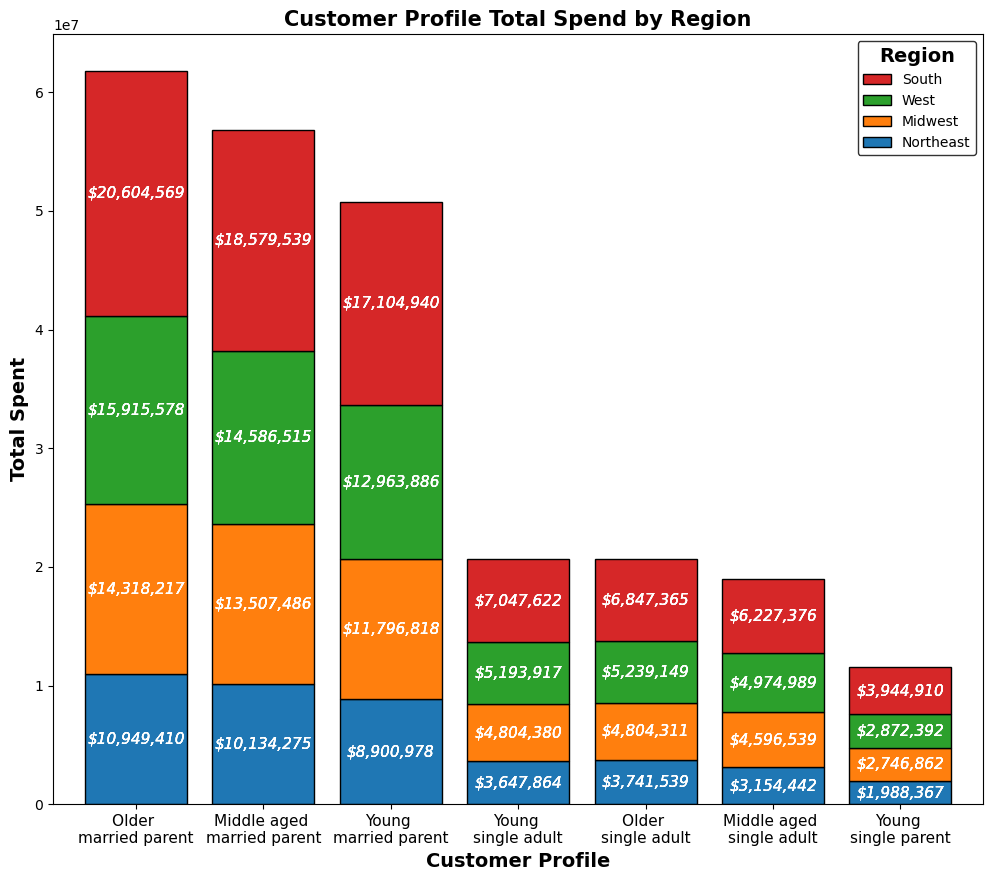

In [9]:
# creates bar chart of pv_cust_reg_prices

sbar_cust_reg_prices = pv_cust_reg_prices.sort_values(by='South', ascending=False).plot.bar(stacked=True, width=0.8, figsize=(12, 10), linewidth=1, edgecolor='black')
for customer_profile in sbar_cust_reg_prices.containers:
    
    # adds commas
    for c in sbar_cust_reg_prices.containers:
        sbar_cust_reg_prices.bar_label(c, fmt='${:,.0f}', label_type='center', color='white', fontstyle='italic', fontsize=11)
        
    # adds 20% whitespace to margins to keep labels inside the box
    sbar_cust_reg_prices.margins(x=0.01)

plt.xticks(np.arange(7), ['Older \nmarried parent', 'Middle aged \nmarried parent', 'Young \nmarried parent', 'Young \nsingle adult', 'Older \nsingle adult', 'Middle aged \nsingle adult', 'Young \nsingle parent'], rotation=360, fontsize=11, fontweight='medium')
# \n creates a line break in text
plt.xlabel('Customer Profile', fontsize=14, fontweight='bold')
plt.ylabel('Total Spent', fontsize=14, fontweight='bold')
plt.title('Customer Profile Total Spend by Region', fontsize=15, fontweight='bold')
plt.legend(title='Region', title_fontproperties={'weight':'bold', 'size':14}, loc='upper right', reverse=True, edgecolor='black')

In [40]:
# Export chart to the visualizations folder using savefig() function

sbar_cust_reg_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar_cust_reg_prices.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels

<a id='16'></a> <br>
> # E. Customer Profile spend and Department 

In [6]:
# Change outliers to NaN to correct skew of distribution

ic_final_df.loc[ic_final_df['prices'] >100, 'prices'] = 0

In [7]:
# creates a pivot table of profile, region and dept to find most profitable department

pv_prof_dept_reg_prices = ic_final_df.pivot_table(index=['customer_profile', 'department'], columns=['region'], values='prices',aggfunc = 'sum')

In [8]:
# check output

pv_prof_dept_reg_prices

region                                      Midwest  Northeast      South  \
customer_profile           department                                       
Middle aged married parent alcohol          58561.1    48038.5    85445.1   
                           babies          169019.9   131194.9   253321.1   
                           bakery          497381.6   370128.0   668631.9   
                           beverages      1097276.9   862985.1  1532102.1   
                           breakfast       297435.4   219798.9   412748.0   
...                                             ...        ...        ...   
Young single parent        pantry          169524.5   119285.9   230819.3   
                           personal care    38523.7    27862.9    54138.8   
                           pets             12701.2     5469.6    14674.7   
                           produce         804356.0   586578.1  1185275.7   
                           snacks          125994.2    99664.0   186974.2   

region                                         West  
customer_profile           department                
Middle aged married parent alcohol          78846.0  
                           babies          189645.5  
                           bakery          533334.8  
                           beverages      1192854.9  
                           breakfast       341897.9  
...                                             ...  
Young single parent        pantry          168585.0  
                           personal care    39832.8  
                           pets              9421.3  
                           produce         869419.0  
                           snacks          147500.9  

[147 rows x 4 columns]

In [9]:
# reset index

pv_prof_dept_reg_prices = pv_prof_dept_reg_prices.reset_index()

In [10]:
# check output

pv_prof_dept_reg_prices

region,customer_profile,department,Midwest,Northeast,South,West
0,Middle aged married parent,alcohol,58561.1,48038.5,85445.1,78846.0
1,Middle aged married parent,babies,169019.9,131194.9,253321.1,189645.5
2,Middle aged married parent,bakery,497381.6,370128.0,668631.9,533334.8
3,Middle aged married parent,beverages,1097276.9,862985.1,1532102.1,1192854.9
4,Middle aged married parent,breakfast,297435.4,219798.9,412748.0,341897.9
...,...,...,...,...,...,...
142,Young single parent,pantry,169524.5,119285.9,230819.3,168585.0
143,Young single parent,personal care,38523.7,27862.9,54138.8,39832.8
144,Young single parent,pets,12701.2,5469.6,14674.7,9421.3
145,Young single parent,produce,804356.0,586578.1,1185275.7,869419.0


In [13]:
# create dropdown menu graph to access 7 charts (1 per profile) of 4 subplots (1 per region) each

mypull = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0] # explodes 'produce' wedge

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'pie'}],
           [{'type': 'pie'}, {'type': 'pie'}]]
) # creates a 2 x 2 subplot and specifies type of charts

for t in pv_prof_dept_reg_prices['customer_profile'].unique(): # groups unique 'customer_profile'
    dff = pv_prof_dept_reg_prices[pv_prof_dept_reg_prices['customer_profile'] == t]
    fig.add_trace(go.Pie(
        labels=dff['department'],
        values=dff['Midwest'],
        title='Midwest',
        title_font_size=20,
        visible=True,
        domain=dict(x=[0.0, 0.5], y=[0.5, 1]) # sets chart in top-left quadrant
    ))
    
    fig.add_trace(go.Pie(
        labels=dff['department'],
        values=dff['Northeast'],
        title='Northeast',
        title_font_size=20,
        visible=True,
        domain=dict(x=[0.5, 1], y=[0.5, 1]) # sets chart in top-right quadrant
    ))
    
    fig.add_trace(go.Pie(
        labels=dff['department'],
        values=dff['South'],
        title='South',
        title_font_size=20,
        visible=True,
        domain=dict(x=[0.0, 0.5], y=[0.0, 0.5]) # sets chart in bottome-left quadrant
    ))
    
    fig.add_trace(go.Pie(
        labels=dff['department'],
        values=dff['West'],
        title='West',
        title_font_size=20,
        visible=True,
        domain=dict(x=[0.5, 1], y=[0, 0.5]) # sets chart in bottom-right quadrant
    )) 

    
# creates the dropdown selections
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label='Select a Profile',
                     method='update',
                     args=[{'visible': [False]*28}]), # shorthand for true, false, true, false...
                dict(label='Middle aged married parent',
                     method='update',
                     args=[{'visible': [True]*4 + [False]*24}]),
                dict(label='Middle aged single adult',
                     method='update',
                     args=[{'visible': [False]*4 + [True]*4 + [False]*20}]),
                dict(label='Older married parent',
                     method='update',
                     args=[{'visible': [False]*8 + [True]*4 + [False]*16}]),
                dict(label='Older single adult',
                     method='update',
                     args=[{'visible': [False]*12 + [True]*4 + [False]*12}]),
                dict(label='Young married parent',
                     method='update',
                     args=[{'visible': [False]*16 + [True]*4 + [False]*8}]),
                dict(label='Young single adult',
                     method='update',
                     args=[{'visible': [False]*20 + [True]*4 + [False]*4}]),
                dict(label='Young single parent',
                     method='update',
                     args=[{'visible': [False]*24 + [True]*4}]),
            ]),
        )
    ])

fig.update_layout(
    legend=dict(
    orientation='v',
    yanchor='auto',
    y=0.9,
    xanchor='right',
    x=-0.1), # sets legend on left and below dropdown
    autosize=True, # keeps charts/layout evenly displayed
    uniformtext_minsize=13.5,
    uniformtext_mode='hide', # sets inside labels to at least fontsize 13.5 and hides the ones that don't fit
    height=900,
    width=1050, # height and width adjusted to increase chart sizes
    title='Customer Profile Expenditure by Department & Region',
    font_size=16,
    title_x=0.5,
    title_xanchor='center', # centers the title
    legend_title='Department',
)

fig.update_traces(textposition='inside', # moves all text/labels inside the wedges
                  marker=dict(line=dict(color='#000000', width=1)), # gives outline to charts
                  hoverinfo='label+percent', 
                  pull=mypull, # applies the explode parameter from above
                  textinfo='label+percent',
)

fig.update_annotations(font_size=20) # increases the subplot title fontsize

# save.fig saved a blank screen, used screenshot instead to save to 'Visualizations' folder 

fig.show()

In [14]:
# check output

pv_prof_dept_reg_prices

region,customer_profile,department,Midwest,Northeast,South,West
0,Middle aged married parent,alcohol,58561.1,48038.5,85445.1,78846.0
1,Middle aged married parent,babies,169019.9,131194.9,253321.1,189645.5
2,Middle aged married parent,bakery,497381.6,370128.0,668631.9,533334.8
3,Middle aged married parent,beverages,1097276.9,862985.1,1532102.1,1192854.9
4,Middle aged married parent,breakfast,297435.4,219798.9,412748.0,341897.9
...,...,...,...,...,...,...
142,Young single parent,pantry,169524.5,119285.9,230819.3,168585.0
143,Young single parent,personal care,38523.7,27862.9,54138.8,39832.8
144,Young single parent,pets,12701.2,5469.6,14674.7,9421.3
145,Young single parent,produce,804356.0,586578.1,1185275.7,869419.0


In [15]:
# create 7 individual pie charts if needed

In [16]:
# create 7 subsets (1 for each customer profile) by select rows

mamp_subset = pv_prof_dept_reg_prices.iloc[0:21] # Middle aged married parent

masa_subset = pv_prof_dept_reg_prices.iloc[21:42] # Middle aged single adult

omp_subset = pv_prof_dept_reg_prices.iloc[42:63] # Older married parent

osa_subset = pv_prof_dept_reg_prices.iloc[63:84] # Older single adult

ymp_subset = pv_prof_dept_reg_prices.iloc[84:105] # Young married parent

ysa_subset = pv_prof_dept_reg_prices.iloc[105:126] # Young single adult

ysp_subset = pv_prof_dept_reg_prices.iloc[126:147] # Young single parent

In [17]:
# check outputs 

mamp_subset

region,customer_profile,department,Midwest,Northeast,South,West
0,Middle aged married parent,alcohol,58561.1,48038.5,85445.1,78846.0
1,Middle aged married parent,babies,169019.9,131194.9,253321.1,189645.5
2,Middle aged married parent,bakery,497381.6,370128.0,668631.9,533334.8
3,Middle aged married parent,beverages,1097276.9,862985.1,1532102.1,1192854.9
4,Middle aged married parent,breakfast,297435.4,219798.9,412748.0,341897.9
5,Middle aged married parent,bulk,16508.6,10882.4,21844.1,16804.6
6,Middle aged married parent,canned goods,434078.6,317039.5,589544.1,460901.7
7,Middle aged married parent,dairy eggs,2408227.1,1813007.6,3294240.6,2595948.5
8,Middle aged married parent,deli,433150.7,332896.7,591439.9,478004.0
9,Middle aged married parent,dry goods pasta,341792.4,250089.1,466074.5,375399.8


In [18]:
masa_subset

region,customer_profile,department,Midwest,Northeast,South,West
21,Middle aged single adult,alcohol,26242.4,21920.3,29297.6,22025.0
22,Middle aged single adult,babies,57511.0,45900.3,86345.8,55252.7
23,Middle aged single adult,bakery,168849.4,114639.3,224937.3,183951.2
24,Middle aged single adult,beverages,375170.2,269838.5,519196.8,395172.4
25,Middle aged single adult,breakfast,101629.9,72485.4,138679.1,115245.2
26,Middle aged single adult,bulk,4848.4,3500.7,6992.5,5847.0
27,Middle aged single adult,canned goods,141895.8,100039.3,192606.1,157989.4
28,Middle aged single adult,dairy eggs,839546.3,551065.5,1117064.6,878296.2
29,Middle aged single adult,deli,145007.2,99131.1,207809.8,167235.3
30,Middle aged single adult,dry goods pasta,117548.3,78748.0,152436.5,121956.1


In [19]:
omp_subset

region,customer_profile,department,Midwest,Northeast,South,West
42,Older married parent,alcohol,67151.6,43859.8,107036.6,74292.2
43,Older married parent,babies,179368.9,140198.0,275256.5,203489.5
44,Older married parent,bakery,520912.2,409061.6,748211.8,582450.5
45,Older married parent,beverages,1180329.4,924449.7,1708004.0,1289429.3
46,Older married parent,breakfast,320442.5,241606.1,455262.8,353855.1
47,Older married parent,bulk,18230.3,11086.1,24066.8,19649.6
48,Older married parent,canned goods,453368.2,344578.7,658654.6,512494.1
49,Older married parent,dairy eggs,2522261.1,1969703.2,3637667.7,2870181.4
50,Older married parent,deli,464266.6,360088.8,663344.2,508632.4
51,Older married parent,dry goods pasta,360470.8,270198.8,518181.7,392688.1


In [20]:
osa_subset

region,customer_profile,department,Midwest,Northeast,South,West
63,Older single adult,alcohol,25872.5,14128.2,31567.8,23807.5
64,Older single adult,babies,62349.7,45978.0,87857.2,66126.5
65,Older single adult,bakery,175590.1,139185.0,249458.6,188588.4
66,Older single adult,beverages,377999.1,306748.8,576469.0,430257.7
67,Older single adult,breakfast,106924.8,81418.0,152989.0,113682.4
68,Older single adult,bulk,5460.5,4114.1,7708.7,4794.8
69,Older single adult,canned goods,147892.9,114331.9,211151.9,161607.5
70,Older single adult,dairy eggs,857703.2,676723.9,1216340.1,942038.4
71,Older single adult,deli,159354.8,127220.8,222191.0,172003.4
72,Older single adult,dry goods pasta,121675.3,95867.4,167261.8,130810.8


In [21]:
ymp_subset

region,customer_profile,department,Midwest,Northeast,South,West
84,Young married parent,alcohol,53406.9,41501.4,92578.5,64612.0
85,Young married parent,babies,155037.4,125017.3,216332.1,160748.5
86,Young married parent,bakery,415337.4,325096.3,627350.6,479662.2
87,Young married parent,beverages,960909.0,722789.7,1383187.3,1036589.8
88,Young married parent,breakfast,261577.8,197475.9,390233.6,290810.4
89,Young married parent,bulk,14441.1,10067.0,19334.7,15642.2
90,Young married parent,canned goods,374513.1,272674.1,545566.8,420627.8
91,Young married parent,dairy eggs,2117450.2,1602508.9,3086027.3,2321275.2
92,Young married parent,deli,385466.0,282131.7,541869.6,419663.8
93,Young married parent,dry goods pasta,291685.0,218434.5,432807.5,332435.3


In [22]:
ysa_subset

region,customer_profile,department,Midwest,Northeast,South,West
105,Young single adult,alcohol,25839.9,21602.9,28423.6,23620.5
106,Young single adult,babies,66364.4,43358.3,98892.5,68832.4
107,Young single adult,bakery,177988.9,138058.8,255252.4,187977.3
108,Young single adult,beverages,394570.2,305466.9,577660.4,424029.3
109,Young single adult,breakfast,106362.8,81894.4,153913.7,114219.4
110,Young single adult,bulk,4319.7,4240.8,8401.8,6172.9
111,Young single adult,canned goods,154790.7,118285.3,227974.9,161098.8
112,Young single adult,dairy eggs,860098.0,652860.5,1264811.5,934206.2
113,Young single adult,deli,154137.0,117840.2,239037.4,166207.1
114,Young single adult,dry goods pasta,119956.1,89114.8,173877.2,131198.1


In [23]:
ysp_subset

region,customer_profile,department,Midwest,Northeast,South,West
126,Young single parent,alcohol,19773.7,10271.3,24876.1,14212.1
127,Young single parent,babies,38604.3,23897.6,51507.3,35688.8
128,Young single parent,bakery,102205.0,71311.3,143602.6,107731.7
129,Young single parent,beverages,216988.1,165645.4,312491.0,220162.9
130,Young single parent,breakfast,58574.1,50412.1,90461.5,65994.0
131,Young single parent,bulk,3142.5,2190.7,5470.4,3449.8
132,Young single parent,canned goods,87711.8,63976.4,125044.9,87339.6
133,Young single parent,dairy eggs,494287.3,355453.3,718105.3,521161.6
134,Young single parent,deli,89342.7,66697.1,131232.8,87786.0
135,Young single parent,dry goods pasta,72106.9,50210.3,97691.3,71465.0


In [24]:
# create list of dfs

df_list = [mamp_subset, masa_subset, omp_subset, osa_subset, ymp_subset, ysa_subset, ysp_subset]

In [25]:
# remove 'customer_profile' from all subsets

for i in df_list:
    i.columns = ['customer_profile', 'department', 'Midwest', 'Northeast', 'South', 'West']
    i.drop(i.columns[0], axis=1, inplace=True)

C:\Users\pjbac\AppData\Local\Temp\ipykernel_24016\522838576.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pjbac\AppData\Local\Temp\ipykernel_24016\522838576.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pjbac\AppData\Local\Temp\ipykernel_24016\522838576.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pjbac\AppData\Local\Temp\ipykernel_24016\522838576.py:5: SettingWithCopyWarning:


A value is 

In [26]:
# check output

mamp_subset

,department,Midwest,Northeast,South,West
0,alcohol,58561.1,48038.5,85445.1,78846.0
1,babies,169019.9,131194.9,253321.1,189645.5
2,bakery,497381.6,370128.0,668631.9,533334.8
3,beverages,1097276.9,862985.1,1532102.1,1192854.9
4,breakfast,297435.4,219798.9,412748.0,341897.9
5,bulk,16508.6,10882.4,21844.1,16804.6
6,canned goods,434078.6,317039.5,589544.1,460901.7
7,dairy eggs,2408227.1,1813007.6,3294240.6,2595948.5
8,deli,433150.7,332896.7,591439.9,478004.0
9,dry goods pasta,341792.4,250089.1,466074.5,375399.8


In [27]:
masa_subset

,department,Midwest,Northeast,South,West
21,alcohol,26242.4,21920.3,29297.6,22025.0
22,babies,57511.0,45900.3,86345.8,55252.7
23,bakery,168849.4,114639.3,224937.3,183951.2
24,beverages,375170.2,269838.5,519196.8,395172.4
25,breakfast,101629.9,72485.4,138679.1,115245.2
26,bulk,4848.4,3500.7,6992.5,5847.0
27,canned goods,141895.8,100039.3,192606.1,157989.4
28,dairy eggs,839546.3,551065.5,1117064.6,878296.2
29,deli,145007.2,99131.1,207809.8,167235.3
30,dry goods pasta,117548.3,78748.0,152436.5,121956.1


In [28]:
# set the index of all new subsets to department

for df in df_list:
    # reset index
    df.set_index('department', inplace=True)

In [29]:
# check output

mamp_subset

,Midwest,Northeast,South,West
department,,,,
alcohol,58561.1,48038.5,85445.1,78846.0
babies,169019.9,131194.9,253321.1,189645.5
bakery,497381.6,370128.0,668631.9,533334.8
beverages,1097276.9,862985.1,1532102.1,1192854.9
breakfast,297435.4,219798.9,412748.0,341897.9
bulk,16508.6,10882.4,21844.1,16804.6
canned goods,434078.6,317039.5,589544.1,460901.7
dairy eggs,2408227.1,1813007.6,3294240.6,2595948.5
deli,433150.7,332896.7,591439.9,478004.0


In [30]:
masa_subset

,Midwest,Northeast,South,West
department,,,,
alcohol,26242.4,21920.3,29297.6,22025.0
babies,57511.0,45900.3,86345.8,55252.7
bakery,168849.4,114639.3,224937.3,183951.2
beverages,375170.2,269838.5,519196.8,395172.4
breakfast,101629.9,72485.4,138679.1,115245.2
bulk,4848.4,3500.7,6992.5,5847.0
canned goods,141895.8,100039.3,192606.1,157989.4
dairy eggs,839546.3,551065.5,1117064.6,878296.2
deli,145007.2,99131.1,207809.8,167235.3


In [31]:
# remove 'department' header from all subsets

for df in df_list:
    # remove header
    df.index.name=''

In [32]:
# check output

mamp_subset

,Midwest,Northeast,South,West
,,,,
alcohol,58561.1,48038.5,85445.1,78846.0
babies,169019.9,131194.9,253321.1,189645.5
bakery,497381.6,370128.0,668631.9,533334.8
beverages,1097276.9,862985.1,1532102.1,1192854.9
breakfast,297435.4,219798.9,412748.0,341897.9
bulk,16508.6,10882.4,21844.1,16804.6
canned goods,434078.6,317039.5,589544.1,460901.7
dairy eggs,2408227.1,1813007.6,3294240.6,2595948.5
deli,433150.7,332896.7,591439.9,478004.0


In [33]:
masa_subset

,Midwest,Northeast,South,West
,,,,
alcohol,26242.4,21920.3,29297.6,22025.0
babies,57511.0,45900.3,86345.8,55252.7
bakery,168849.4,114639.3,224937.3,183951.2
beverages,375170.2,269838.5,519196.8,395172.4
breakfast,101629.9,72485.4,138679.1,115245.2
bulk,4848.4,3500.7,6992.5,5847.0
canned goods,141895.8,100039.3,192606.1,157989.4
dairy eggs,839546.3,551065.5,1117064.6,878296.2
deli,145007.2,99131.1,207809.8,167235.3


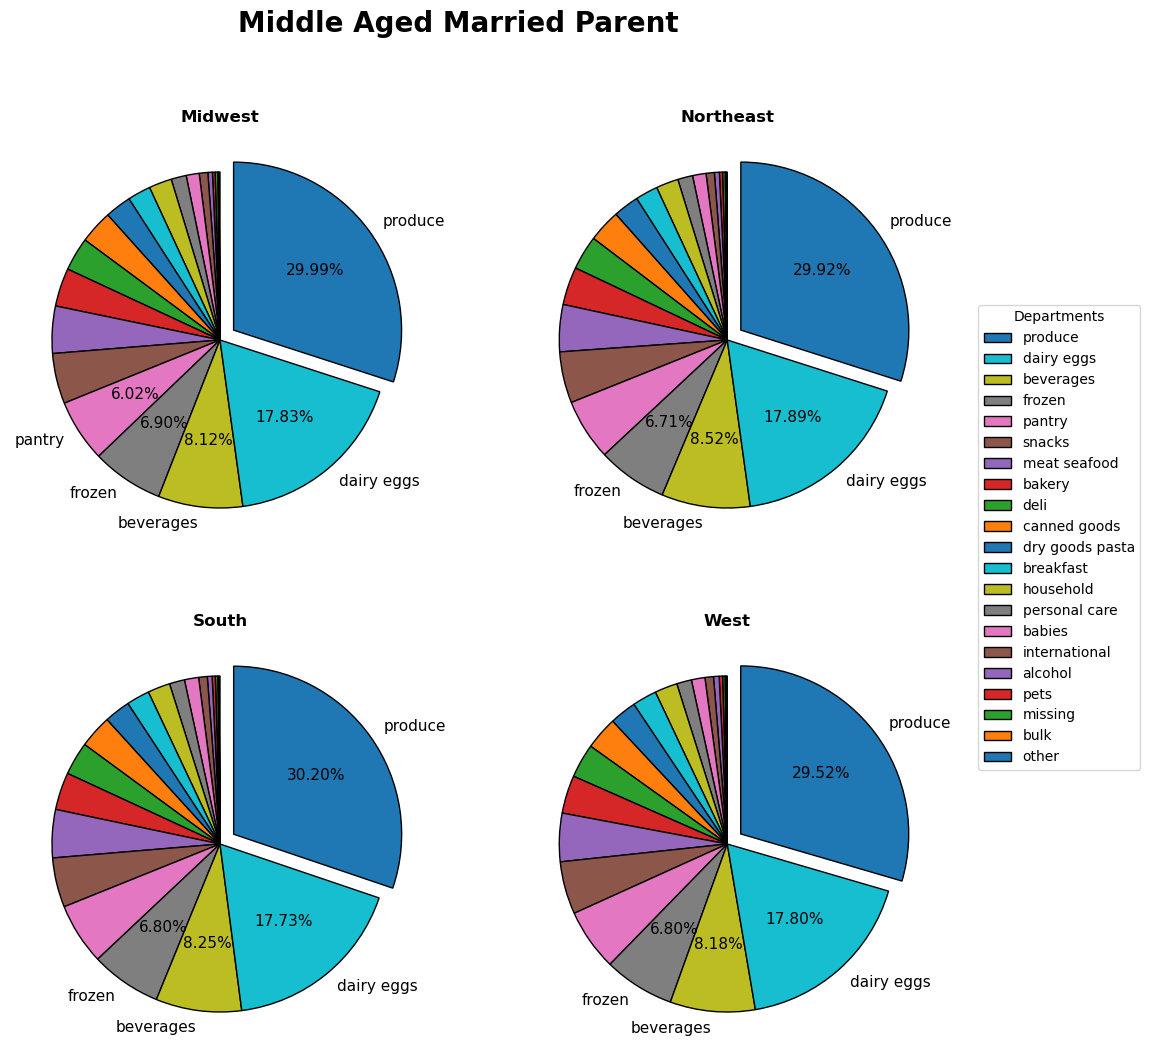

In [35]:
# create 3 different pie charts (4 subsets each)

myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # sets 'produce' wedge to pop out
mywedge_props = {'linewidth' : 1, 'edgecolor' : 'black'}
mytext_props = {'fontsize': 11, 'fontstyle': 'normal'} # sets wedges outline and text properties

# Create a figure and a set of subplots
fig1, axes = plt.subplots(2, 2, figsize=(12, 12))

def my_autopct(pct):
    return ('%1.2f%%' % pct) if pct > 6 else '' # sets percent to display only if greater than 5.5

# Plot each column of the dataframe as a pie chart
for i, column in enumerate(mamp_subset.columns): # iterates following commands over each column of subset
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(mamp_subset[column].sort_values(), 
                                           labels=mamp_subset.sort_values(by=[column], ascending=True).index, 
                                           autopct='%1.2f%%', 
                                           wedgeprops=mywedge_props, 
                                           textprops=mytext_props,  
                                           explode=myexplode,
                                           startangle=90) # creates 2x2 fig of 4 pie charts (1 for each region) 
                                                          # and rotates charts so 'produce' is prominently displayed
    
    threshold = 6
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('') # sets labels to display only if corresponding percentage is greater than 6
            
    axes[i // 2, i % 2].set_title(column, fontsize='12', fontweight='bold') # adds title to each subplot

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels, title='Departments', bbox_to_anchor=(1.5, 1.8)) 

fig1.suptitle('Middle Aged Married Parent', fontsize='20', fontweight='bold')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_mamp_subset.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

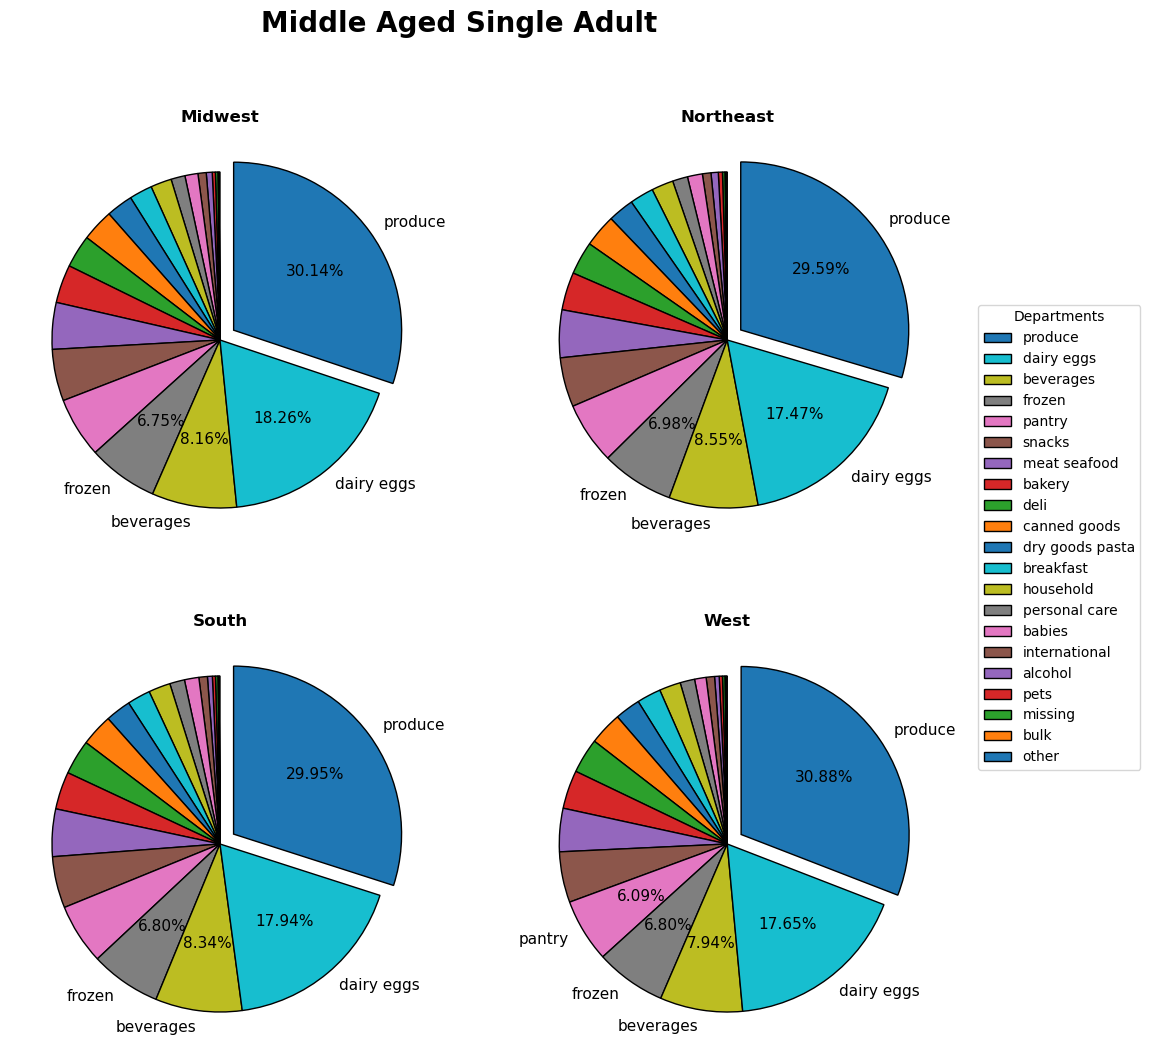

In [38]:
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # sets 'produce' wedge to pop out
mywedge_props = {'linewidth' : 1, 'edgecolor' : 'black'}
mytext_props = {'fontsize': 11, 'fontstyle': 'normal'} # sets wedges outline and text properties

# Create a figure and a set of subplots
fig2, axes = plt.subplots(2, 2, figsize=(12, 12))

def my_autopct(pct):
    return ('%1.2f%%' % pct) if pct > 6 else '' # sets percent to display only if greater than 5.5

# Plot each column of the dataframe as a pie chart
for i, column in enumerate(masa_subset.columns): # iterates following commands over each column of subset
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(masa_subset[column].sort_values(), 
                                           labels=masa_subset.sort_values(by=[column], ascending=True).index, 
                                           autopct='%1.2f%%', 
                                           wedgeprops=mywedge_props, 
                                           textprops=mytext_props,  
                                           explode=myexplode,
                                           startangle=90) # creates 2x2 fig of 4 pie charts (1 for each region) 
                                                          # and rotates charts so 'produce' is prominently displayed
    
    threshold = 6
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('') # sets labels to display only if corresponding percentage is greater than 6
            
    axes[i // 2, i % 2].set_title(column, fontsize='12', fontweight='bold') # adds title to each subplot

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels, title='Departments', bbox_to_anchor=(1.5, 1.8)) 

fig2.suptitle('Middle Aged Single Adult', fontsize='20', fontweight='bold')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_masa_subset.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

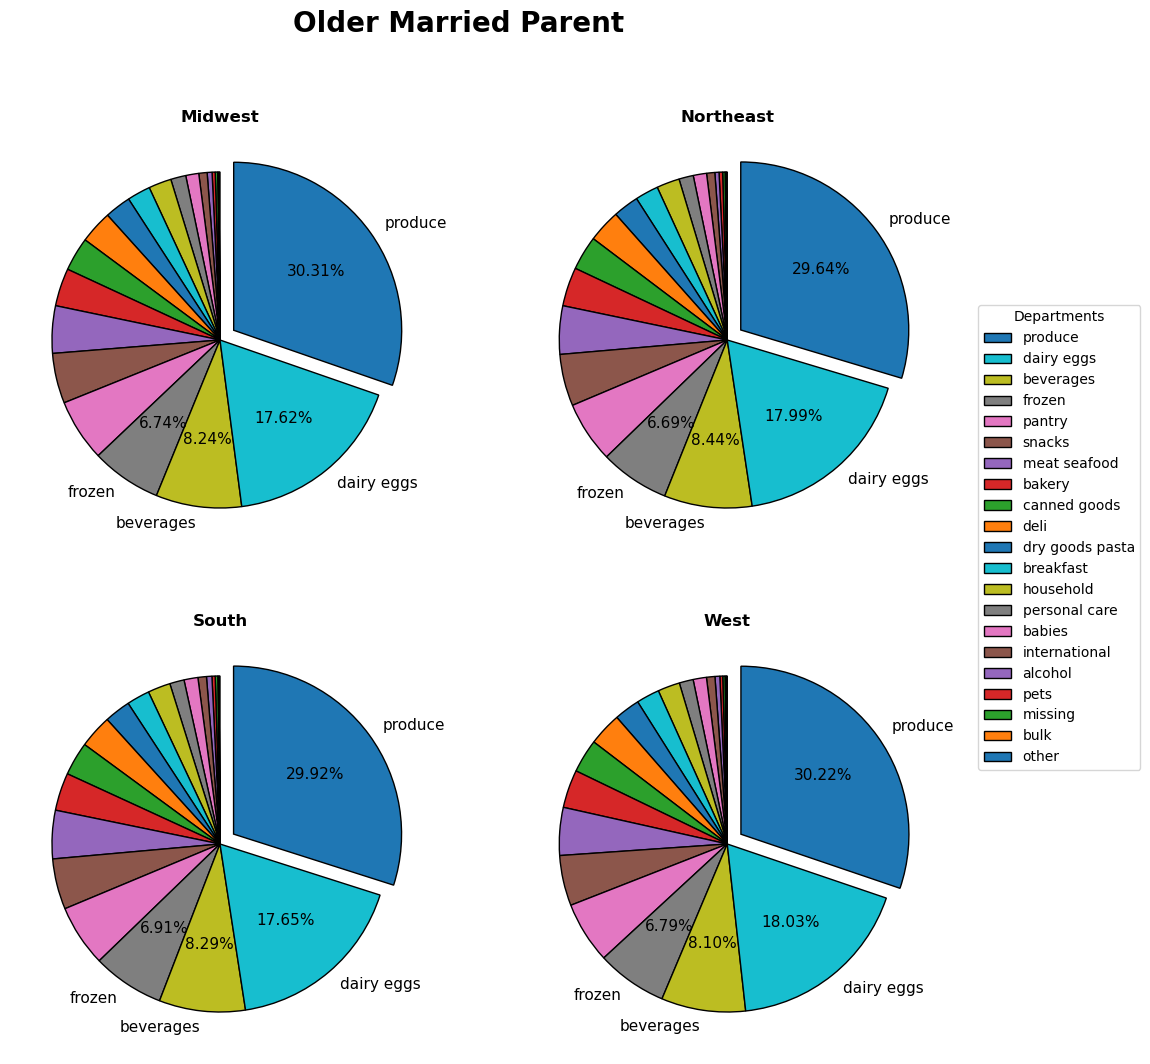

In [39]:
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # sets 'produce' wedge to pop out
mywedge_props = {'linewidth' : 1, 'edgecolor' : 'black'}
mytext_props = {'fontsize': 11, 'fontstyle': 'normal'} # sets wedges outline and text properties

# Create a figure and a set of subplots
fig3, axes = plt.subplots(2, 2, figsize=(12, 12))

def my_autopct(pct):
    return ('%1.2f%%' % pct) if pct > 6 else '' # sets percent to display only if greater than 5.5

# Plot each column of the dataframe as a pie chart
for i, column in enumerate(omp_subset.columns): # iterates following commands over each column of subset
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(omp_subset[column].sort_values(), 
                                           labels=omp_subset.sort_values(by=[column], ascending=True).index, 
                                           autopct='%1.2f%%', 
                                           wedgeprops=mywedge_props, 
                                           textprops=mytext_props,  
                                           explode=myexplode,
                                           startangle=90) # creates 2x2 fig of 4 pie charts (1 for each region) 
                                                          # and rotates charts so 'produce' is prominently displayed
    
    threshold = 6
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('') # sets labels to display only if corresponding percentage is greater than 6
            
    axes[i // 2, i % 2].set_title(column, fontsize='12', fontweight='bold') # adds title to each subplot

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels, title='Departments', bbox_to_anchor=(1.5, 1.8)) 

fig3.suptitle('Older Married Parent', fontsize='20', fontweight='bold')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_omp_subset.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

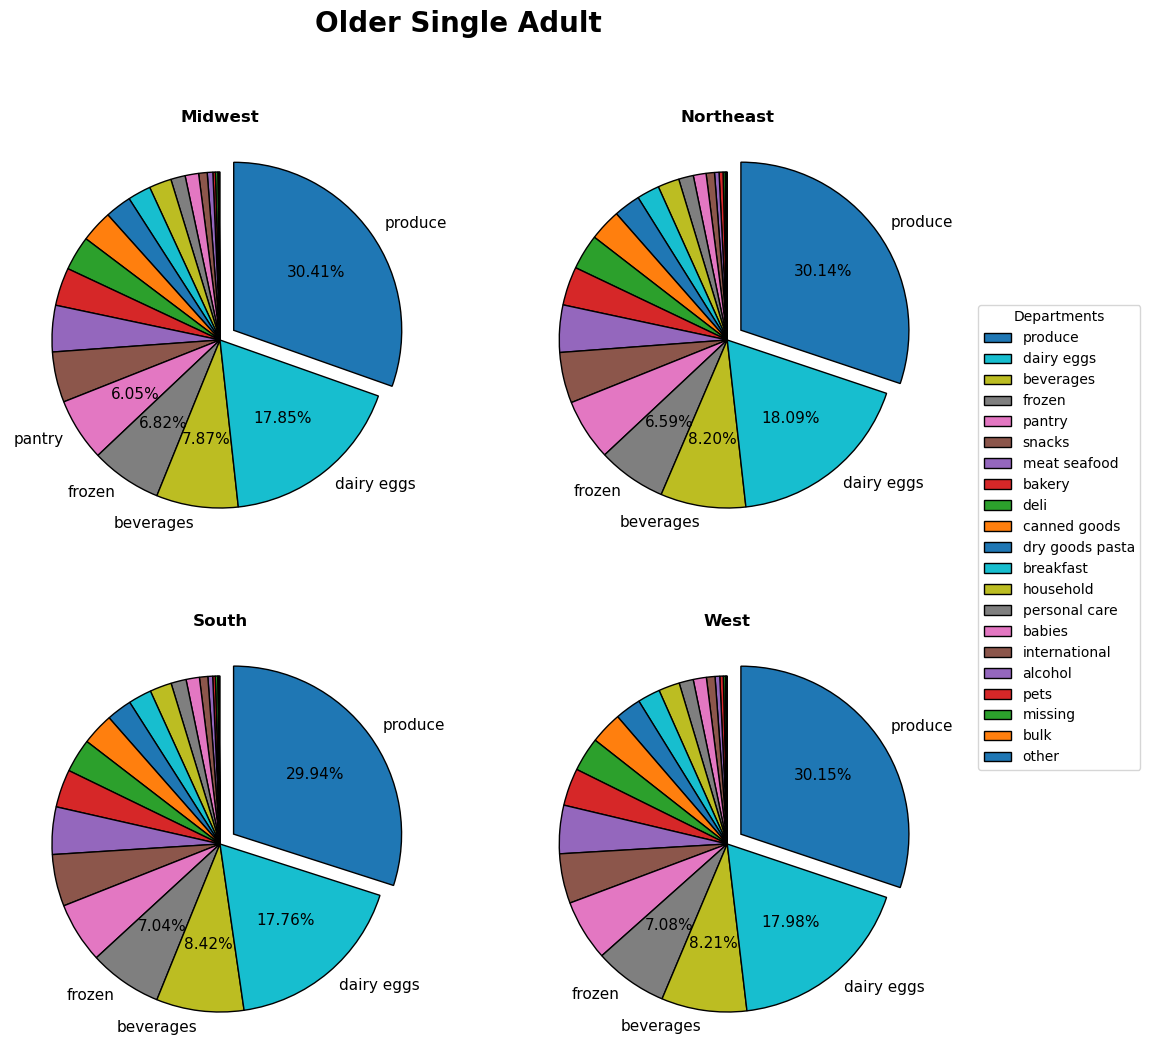

In [40]:
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # sets 'produce' wedge to pop out
mywedge_props = {'linewidth' : 1, 'edgecolor' : 'black'}
mytext_props = {'fontsize': 11, 'fontstyle': 'normal'} # sets wedges outline and text properties

# Create a figure and a set of subplots
fig4, axes = plt.subplots(2, 2, figsize=(12, 12))

def my_autopct(pct):
    return ('%1.2f%%' % pct) if pct > 6 else '' # sets percent to display only if greater than 5.5

# Plot each column of the dataframe as a pie chart
for i, column in enumerate(osa_subset.columns): # iterates following commands over each column of subset
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(osa_subset[column].sort_values(), 
                                           labels=osa_subset.sort_values(by=[column], ascending=True).index, 
                                           autopct='%1.2f%%', 
                                           wedgeprops=mywedge_props, 
                                           textprops=mytext_props,  
                                           explode=myexplode,
                                           startangle=90) # creates 2x2 fig of 4 pie charts (1 for each region) 
                                                          # and rotates charts so 'produce' is prominently displayed
    
    threshold = 6
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('') # sets labels to display only if corresponding percentage is greater than 6
            
    axes[i // 2, i % 2].set_title(column, fontsize='12', fontweight='bold') # adds title to each subplot

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels, title='Departments', bbox_to_anchor=(1.5, 1.8)) 

fig4.suptitle('Older Single Adult', fontsize='20', fontweight='bold')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_osa_subset.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

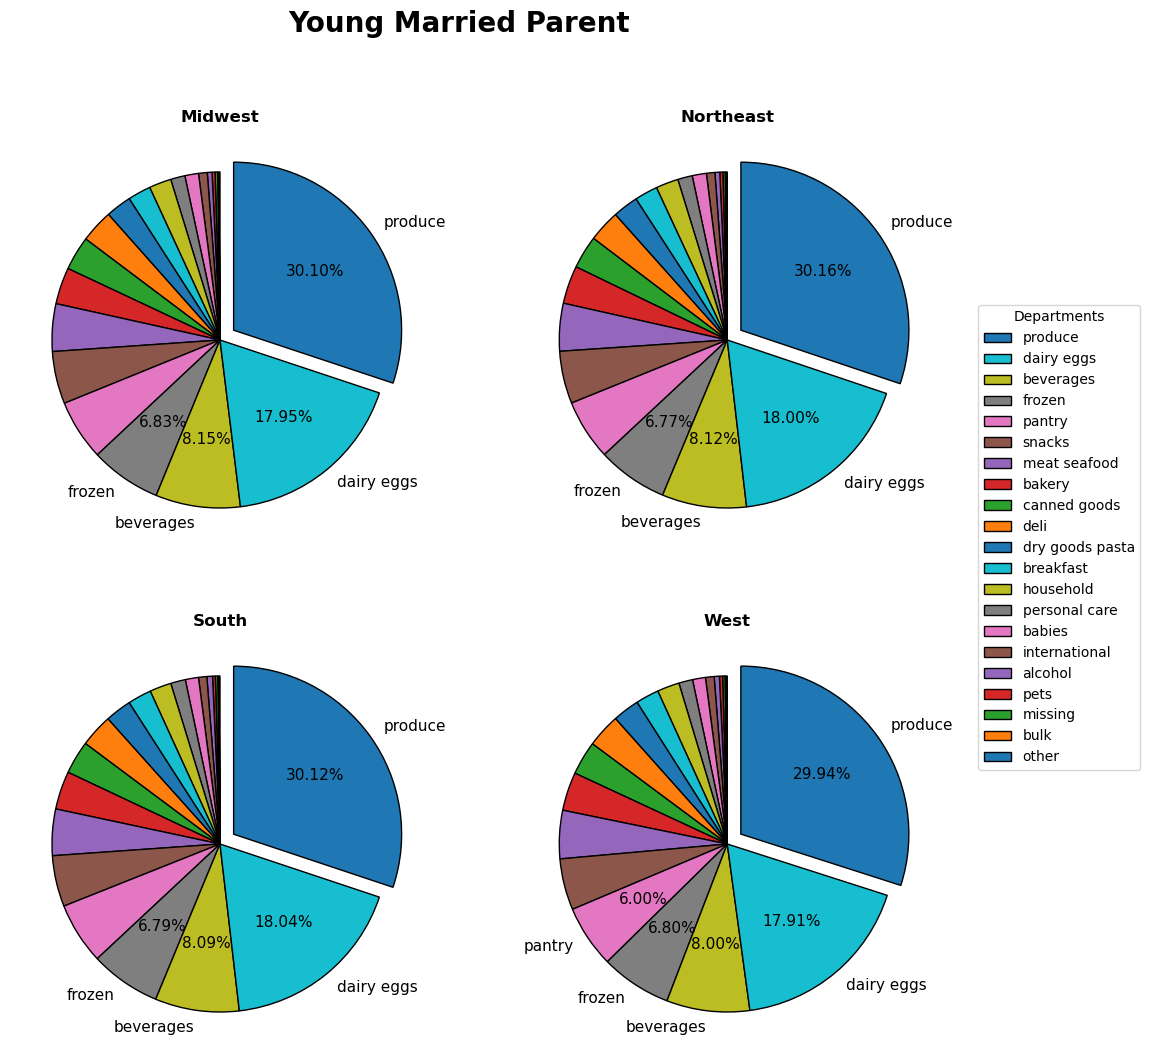

In [41]:
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # sets 'produce' wedge to pop out
mywedge_props = {'linewidth' : 1, 'edgecolor' : 'black'}
mytext_props = {'fontsize': 11, 'fontstyle': 'normal'} # sets wedges outline and text properties

# Create a figure and a set of subplots
fig5, axes = plt.subplots(2, 2, figsize=(12, 12))

def my_autopct(pct):
    return ('%1.2f%%' % pct) if pct > 6 else '' # sets percent to display only if greater than 5.5

# Plot each column of the dataframe as a pie chart
for i, column in enumerate(ymp_subset.columns): # iterates following commands over each column of subset
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(ymp_subset[column].sort_values(), 
                                           labels=ymp_subset.sort_values(by=[column], ascending=True).index, 
                                           autopct='%1.2f%%', 
                                           wedgeprops=mywedge_props, 
                                           textprops=mytext_props,  
                                           explode=myexplode,
                                           startangle=90) # creates 2x2 fig of 4 pie charts (1 for each region) 
                                                          # and rotates charts so 'produce' is prominently displayed
    
    threshold = 6
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('') # sets labels to display only if corresponding percentage is greater than 6
            
    axes[i // 2, i % 2].set_title(column, fontsize='12', fontweight='bold') # adds title to each subplot

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels, title='Departments', bbox_to_anchor=(1.5, 1.8)) 

fig5.suptitle('Young Married Parent', fontsize='20', fontweight='bold')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_ymp_subset.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

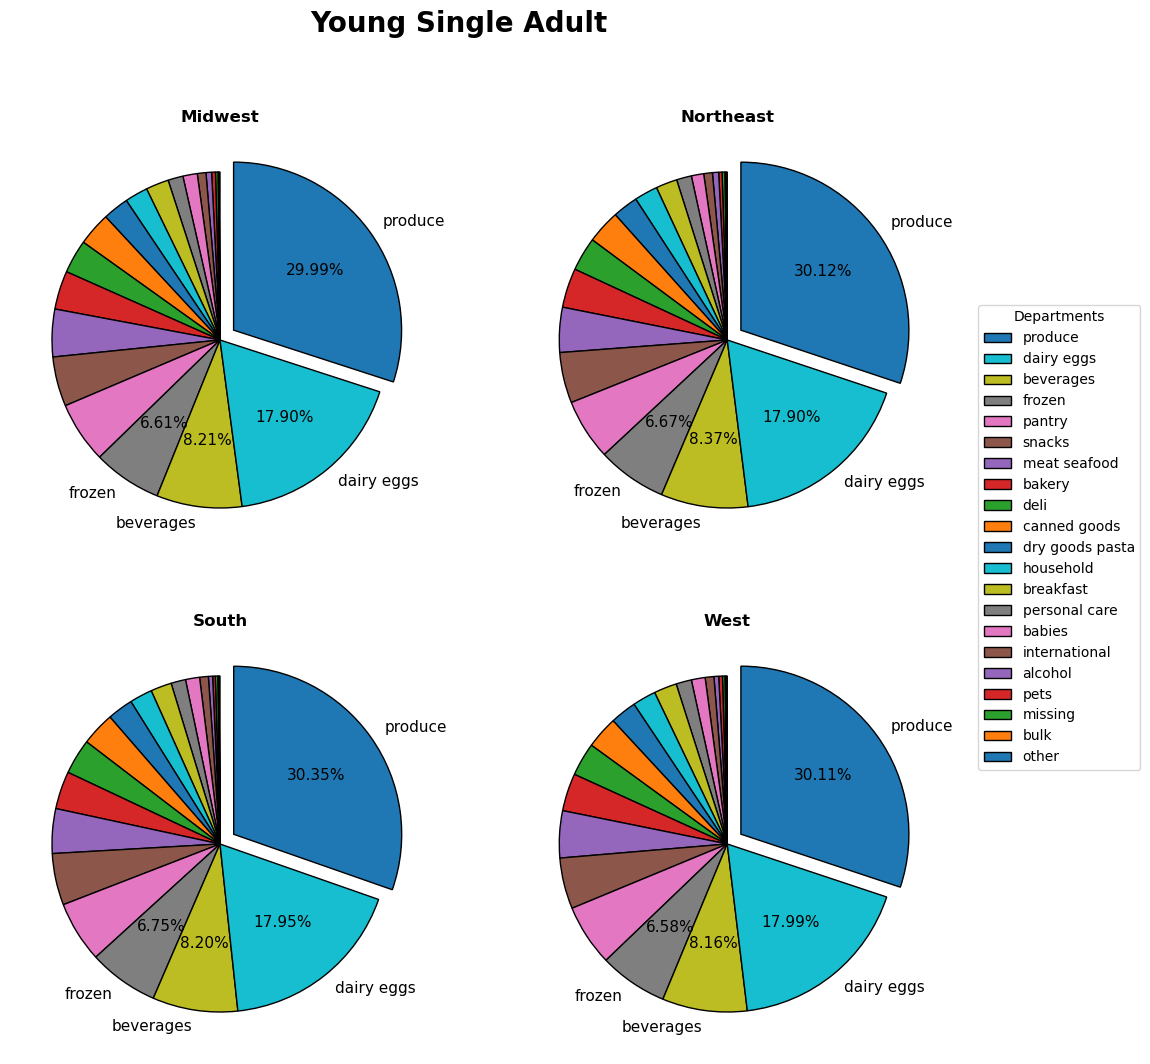

In [42]:
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # sets 'produce' wedge to pop out
mywedge_props = {'linewidth' : 1, 'edgecolor' : 'black'}
mytext_props = {'fontsize': 11, 'fontstyle': 'normal'} # sets wedges outline and text properties

# Create a figure and a set of subplots
fig6, axes = plt.subplots(2, 2, figsize=(12, 12))

def my_autopct(pct):
    return ('%1.2f%%' % pct) if pct > 6 else '' # sets percent to display only if greater than 5.5

# Plot each column of the dataframe as a pie chart
for i, column in enumerate(ysa_subset.columns): # iterates following commands over each column of subset
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(ysa_subset[column].sort_values(), 
                                           labels=ysa_subset.sort_values(by=[column], ascending=True).index, 
                                           autopct='%1.2f%%', 
                                           wedgeprops=mywedge_props, 
                                           textprops=mytext_props,  
                                           explode=myexplode,
                                           startangle=90) # creates 2x2 fig of 4 pie charts (1 for each region) 
                                                          # and rotates charts so 'produce' is prominently displayed
    
    threshold = 6
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('') # sets labels to display only if corresponding percentage is greater than 6
            
    axes[i // 2, i % 2].set_title(column, fontsize='12', fontweight='bold') # adds title to each subplot

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels, title='Departments', bbox_to_anchor=(1.5, 1.8)) 

fig6.suptitle('Young Single Adult', fontsize='20', fontweight='bold')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_ysa_subset.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

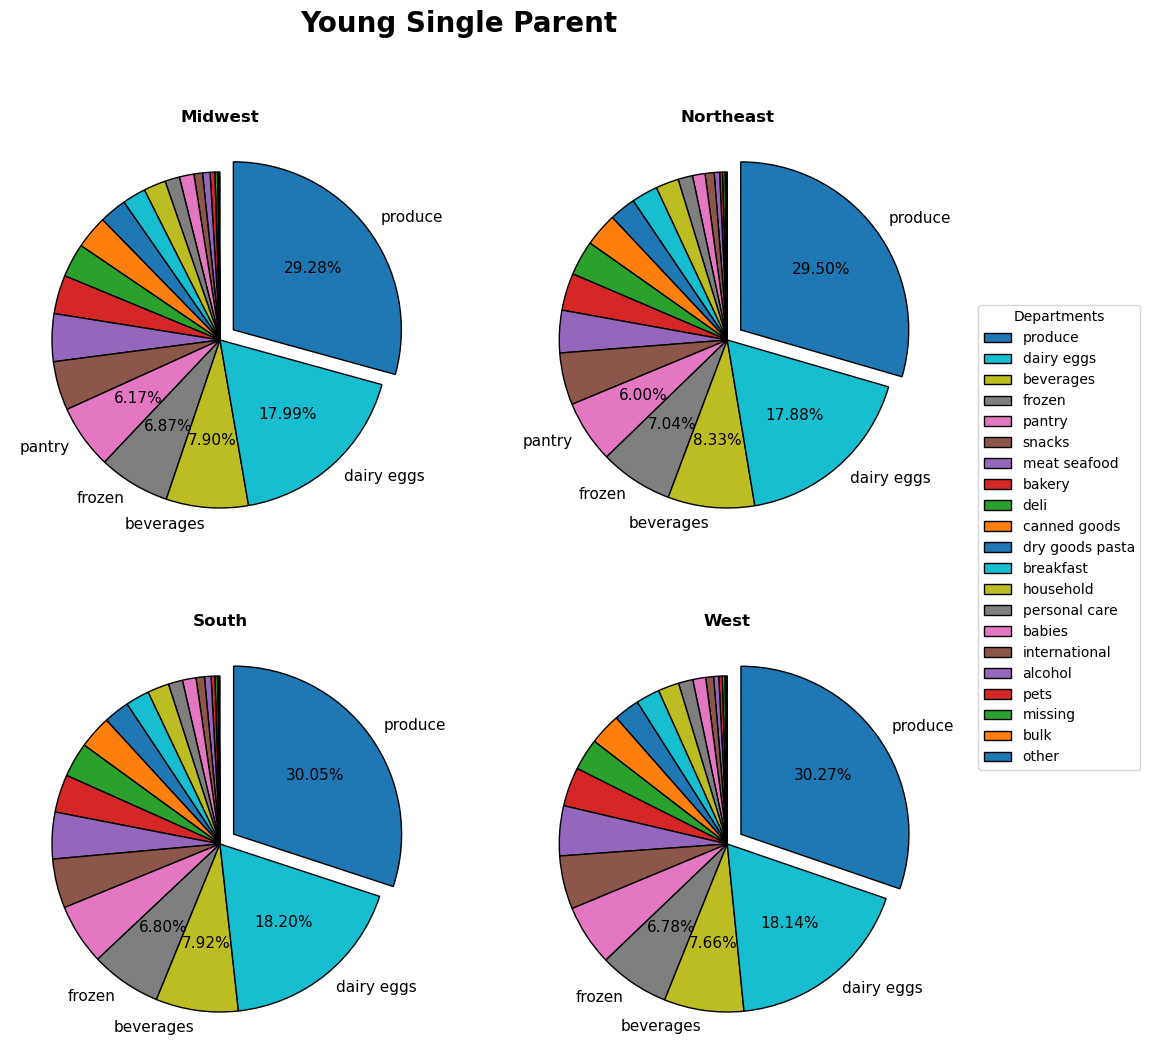

In [43]:
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # sets 'produce' wedge to pop out
mywedge_props = {'linewidth' : 1, 'edgecolor' : 'black'}
mytext_props = {'fontsize': 11, 'fontstyle': 'normal'} # sets wedges outline and text properties

# Create a figure and a set of subplots
fig7, axes = plt.subplots(2, 2, figsize=(12, 12))

def my_autopct(pct):
    return ('%1.2f%%' % pct) if pct > 6 else '' # sets percent to display only if greater than 5.5

# Plot each column of the dataframe as a pie chart
for i, column in enumerate(ysp_subset.columns): # iterates following commands over each column of subset
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(ysp_subset[column].sort_values(), 
                                           labels=ysp_subset.sort_values(by=[column], ascending=True).index, 
                                           autopct='%1.2f%%', 
                                           wedgeprops=mywedge_props, 
                                           textprops=mytext_props,  
                                           explode=myexplode,
                                           startangle=90) # creates 2x2 fig of 4 pie charts (1 for each region) 
                                                          # and rotates charts so 'produce' is prominently displayed
    
    threshold = 6
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('') # sets labels to display only if corresponding percentage is greater than 6
            
    axes[i // 2, i % 2].set_title(column, fontsize='12', fontweight='bold') # adds title to each subplot

# get current handles and labels
# this must be done AFTER plotting
current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels, title='Departments', bbox_to_anchor=(1.5, 1.8)) 

fig7.suptitle('Young Single Parent', fontsize='20', fontweight='bold')

# Export chart to the visualizations folder using savefig() function

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_ysp_subset.png'), bbox_inches='tight') # saves png w/out cutting off x,yaxis labels
plt.show()  

<a id='17'></a> <br>
# 3. Check final df and remove/rename columns

In [7]:
# check output

ic_final_df.head(5)

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day_x,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age_range,age_group,income_group,most_freq_dept,most_ordered_product,most_freq_day,fav_day_to_shop,most_freq_hour,fav_time_to_shop,customer_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent


In [8]:
# rename order hour of day x column

ic_final_df = ic_final_df.rename(columns={'order_hour_of_day_x': 'order_hour_of_day'})

In [14]:
# check output

ic_final_df.head(5)

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,order_freq_flag,gender,state,age,dependants,fam_status,income,region,max_order,low_activity_flag,department,age_range,age_group,income_group,most_freq_dept,most_ordered_product,most_freq_day,fav_day_to_shop,most_freq_hour,fav_time_to_shop,customer_profile,prior_order_median
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,keep,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0


In [17]:
# drop add_to_cart_order, reordered, product_id, aisle_id, department_id, low_activity_flag

ict_final_df = ic_final_df.drop(columns=['add_to_cart_order', 'reordered', 'product_id', 'aisle_id', 'department_id', 'low_activity_flag'])

In [18]:
# check output

ict_final_df

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,order_freq_flag,gender,state,age,dependants,fam_status,income,region,max_order,department,age_range,age_group,income_group,most_freq_dept,most_ordered_product,most_freq_day,fav_day_to_shop,most_freq_hour,fav_time_to_shop,customer_profile,prior_order_median
0,2539329,1,1,2,8,0.0,Soda,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
1,2398795,1,2,3,7,15.0,Soda,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
2,473747,1,3,3,12,21.0,Soda,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
3,2254736,1,4,4,7,29.0,Soda,9.0,Mid-range product,Least busy days,Average orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
4,431534,1,5,4,15,28.0,Soda,9.0,Mid-range product,Least busy days,Most orders,New customer,Low spender,Regular customer,Female,Alabama,31,3,married,40423,South,10,beverages,25-34,Young,Low income,snacks,Original Beef Jerky,4,Weekdays,7,Morning,Young married parent,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,2501801,194803,1,4,15,0.0,Baby Dry Diapers Size 4,10.3,Mid-range product,Least busy days,Most orders,New customer,Low spender,Non-frequent customer,Male,Massachusetts,63,0,divorced/widowed,125997,Northeast,7,babies,55-64,Older,Middle income,babies,Baby Dry Diapers Size 4,4,Weekdays,15,Afternoon,Older single adult,30.0
30964560,1763623,194803,3,3,16,13.0,Baby Dry Diapers Size 4,10.3,Mid-range product,Least busy days,Most orders,New customer,Low spender,Non-frequent customer,Male,Massachusetts,63,0,divorced/widowed,125997,Northeast,7,babies,55-64,Older,Middle income,babies,Baby Dry Diapers Size 4,4,Weekdays,15,Afternoon,Older single adult,30.0
30964561,1947492,194803,4,2,10,20.0,Baby Dry Diapers Size 4,10.3,Mid-range product,Regularly busy,Most orders,New customer,Low spender,Non-frequent customer,Male,Massachusetts,63,0,divorced/widowed,125997,Northeast,7,babies,55-64,Older,Middle income,babies,Baby Dry Diapers Size 4,4,Weekdays,15,Afternoon,Older single adult,30.0
30964562,1903809,194803,5,4,17,23.0,Baby Dry Diapers Size 4,10.3,Mid-range product,Least busy days,Average orders,New customer,Low spender,Non-frequent customer,Male,Massachusetts,63,0,divorced/widowed,125997,Northeast,7,babies,55-64,Older,Middle income,babies,Baby Dry Diapers Size 4,4,Weekdays,15,Afternoon,Older single adult,30.0


In [19]:
# exports ict_final_df

ict_final_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ict_final_df.pkl'))